In [1]:
#flagged for one-hot encoding: DOMAIN; INCOME; GENDER; WEALTH; WEALTH2; GEOCODE2

In [2]:
#NOTE: RFA's subject to one-hot encoding but with caveat of not being optimal

In [3]:
#CHILD03 	CHILD07 	CHILD12 	CHILD18 	NUMCHLD

In [4]:
#ADATE_2 	ADATE_3 	ADATE_4 	ADATE_5 	ADATE_6 	ADATE_7 	ADATE_8 	ADATE_9 	ADATE_10 	ADATE_11 	ADATE_12 	ADATE_13 	ADATE_14 	ADATE_15 	ADATE_16 	ADATE_17 	ADATE_18 	ADATE_19 	ADATE_20 	ADATE_21 	ADATE_22 	ADATE_23 	ADATE_24 	RFA_2 	RFA_3 	RFA_4 	RFA_5 	RFA_6 	RFA_7 	RFA_8 	RFA_9 	RFA_10 	RFA_11 	RFA_12 	RFA_13 	RFA_14 	RFA_15 	RFA_16 	RFA_17 	RFA_18 	RFA_19 	RFA_20 	RFA_21 	RFA_22 	RFA_23 	RFA_24

In [5]:
#Loading libraries
import pandas as pd
from pandas_profiling import ProfileReport

import numpy as np

import scipy as sp
from scipy.stats import spearmanr

import seaborn as sns

import math

from datetime import datetime
import calendar

import matplotlib
import matplotlib.pyplot as plt

import os

import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score # New
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
import seaborn as sns

import mglearn

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

In [6]:
data = pd.read_csv('donors.csv')
print(data.shape)
pd.options.display.max_columns = 476
data

(95412, 476)


Unnamed: 0     ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE  \
0               0  2009-01-01     GRI      0    IL  61081                     
1               1  2014-01-01     BOA      1    CA  91326                     
2               2  2010-01-01     AMH      1    NC  27017                     
3               3  2007-01-01     BRY      0    CA  95953                     
4               4  2006-01-01              0    FL  33176                     
...           ...         ...     ...    ...   ...    ...      ...      ...   
95407       95407  2016-01-01     ASE      1    AK  99504                     
95408       95408  2016-01-01     DCD      1    TX  77379                     
95409       95409  2015-01-01     MBC      1    MI  48910                     
95410       95410  2006-01-01     PRV      0    CA  91320                     
95411       95411  2008-01-01     MCC      2    NC  28409                     

              DOB NOEXCH RECINHSE RECP3 RECPGVG RECSWEEP MDMAUD DOMAIN  \
0      1957-12-01      0                                   XXXX     T2   
1      1972-02-01      0                                   XXXX     S1   
2             NaN      0                                   XXXX     R2   
3      1948-01-01      0                                   XXXX     R2   
4      1940-01-01      0        X     X                    XXXX     S2   
...           ...    ...      ...   ...     ...      ...    ...    ...   
95407         NaN      0                                   XXXX     C2   
95408  1970-01-01      0                                   XXXX     C1   
95409  1958-01-01      0              X                    XXXX     C3   
95410  1960-05-01      0        X                          XXXX     C1   
95411  1938-01-01      0        X             X            C1CM     C1   

      HOMEOWNR CHILD03 CHILD07 CHILD12 CHILD18  NUMCHLD  INCOME GENDER  \
0                                                   NaN     NaN      F   
1            H                               M      1.0     6.0      M   
2            U                                      NaN     3.0      M   
3            U                                      NaN     1.0      F   
4            H                                      1.0     3.0      F   
...        ...     ...     ...     ...     ...      ...     ...    ...   
95407                                               NaN     NaN      M   
95408        H                               M      1.0     7.0      M   
95409                                               NaN     NaN      M   
95410        H                                      NaN     7.0      F   
95411        U                                      NaN     5.0      F   

       WEALTH1  HIT  MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  MAGFAML  MAGFEM  \
0          NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
1          9.0   16      0.0       0.0      3.0       1.0      1.0     1.0   
2          1.0    2      0.0       0.0      1.0       0.0      0.0     0.0   
3          4.0    2      0.0       0.0      0.0       0.0      0.0     0.0   
4          2.0   60      1.0       0.0      9.0       0.0      4.0     1.0   
...        ...  ...      ...       ...      ...       ...      ...     ...   
95407      NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
95408      9.0    1      0.0       0.0      1.0       0.0      0.0     0.0   
95409      NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
95410      NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
95411      8.0    3      0.0       0.0      0.0       0.0      1.0     0.0   

       MAGMALE  PUBGARDN  PUBCULIN  PUBHLTH  PUBDOITY  PUBNEWFN  PUBPHOTO  \
0          NaN       NaN       NaN      NaN       NaN       NaN       NaN   
1          0.0       0.0       0.0      2.0       0.0       3.0       0.0   
2          0.0       0.0       0.0      1.0       0.0       0.0       0.0   
3          0.0       0.0       0.0 

In [7]:
list(data.columns)

['Unnamed: 0',
 'ODATEDW',
 'OSOURCE',
 'TCODE',
 'STATE',
 'ZIP',
 'MAILCODE',
 'PVASTATE',
 'DOB',
 'NOEXCH',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'MDMAUD',
 'DOMAIN',
 'HOMEOWNR',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'NUMCHLD',
 'INCOME',
 'GENDER',
 'WEALTH1',
 'HIT',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'DATASRCE',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'WEALTH2',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'E

In [8]:
data.describe(include="all")

Unnamed: 0     ODATEDW OSOURCE         TCODE  STATE    ZIP MAILCODE  \
count   95412.000000       95412   95412  95412.000000  95412  95412    95412   
unique           NaN          54     896           NaN     57  19938        2   
top              NaN  2015-01-01     MBC           NaN     CA  85351            
freq             NaN       15358    4539           NaN  17343     61    94013   
mean    47705.500000         NaN     NaN     54.223117    NaN    NaN      NaN   
std     27543.216279         NaN     NaN    953.844476    NaN    NaN      NaN   
min         0.000000         NaN     NaN      0.000000    NaN    NaN      NaN   
25%     23852.750000         NaN     NaN      0.000000    NaN    NaN      NaN   
50%     47705.500000         NaN     NaN      1.000000    NaN    NaN      NaN   
75%     71558.250000         NaN     NaN      2.000000    NaN    NaN      NaN   
max     95411.000000         NaN     NaN  72002.000000    NaN    NaN      NaN   

       PVASTATE         DOB NOEXCH RECINHSE  RECP3 RECPGVG RECSWEEP MDMAUD  \
count     95412       71529  95412    95412  95412   95412    95412  95412   
unique        3         847      6        2      2       2        2     28   
top              1968-01-01      0                                    XXXX   
freq      93954        1479  61203    88709  93395   95298    93795  95118   
mean        NaN         NaN    NaN      NaN    NaN     NaN      NaN    NaN   
std         NaN         NaN    NaN      NaN    NaN     NaN      NaN    NaN   
min         NaN         NaN    NaN      NaN    NaN     NaN      NaN    NaN   
25%         NaN         NaN    NaN      NaN    NaN     NaN      NaN    NaN   
50%         NaN         NaN    NaN      NaN    NaN     NaN      NaN    NaN   
75%         NaN         NaN    NaN      NaN    NaN     NaN      NaN    NaN   
max         NaN         NaN    NaN      NaN    NaN     NaN      NaN    NaN   

       DOMAIN HOMEOWNR CHILD03 CHILD07 CHILD12 CHILD18       NUMCHLD  \
count   95412    95412   95412   95412   95412   95412  12386.000000   
unique     17        3       4       4       4       4           NaN   
top        R2        H                                           NaN   
freq    13623    52354   94266   93846   93601   92565           NaN   
mean      NaN      NaN     NaN     NaN     NaN     NaN      1.527773   
std       NaN      NaN     NaN     NaN     NaN     NaN      0.806861   
min       NaN      NaN     NaN     NaN     NaN     NaN      1.000000   
25%       NaN      NaN     NaN     NaN     NaN     NaN      1.000000   
50%       NaN      NaN     NaN     NaN     NaN     NaN      1.000000   
75%       NaN      NaN     NaN     NaN     NaN     NaN      2.000000   
max       NaN      NaN     NaN     NaN     NaN     NaN      7.000000   

              INCOME GENDER       WEALTH1           HIT       MBCRAFT  \
count   74126.000000  95412  50680.000000  95412.000000  42558.000000   
unique           NaN      7           NaN           NaN           NaN   
top              NaN      F           NaN           NaN           NaN   
freq             NaN  51277           NaN           NaN           NaN   
mean        3.886248    NaN      5.345699      3.321438      0.152075   
std         1.854960    NaN      2.742490      9.306899      0.470023   
min         1.000000    NaN      0.000000      0.000000      0.000000   
25%         2.000000    NaN      3.000000      0.000000      0.000000   
50%         4.000000    NaN      6.000000      0.000000      0.000000   
75%         5.000000    NaN      8.000000      3.000000      0.000000   
max         7.000000    NaN      9.000000    241.000000      6.000000   

            MBGARDEN       MBBOOKS      MBCOLECT       MAGFAML        MAGFEM  \
count   42558.000000  42558.000000  42498.000000  42558.000000  42558.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN    

In [9]:
data.duplicated().sum()

0

In [10]:
null_values = pd.DataFrame(round((data.isna().sum()/len(data))*100,2))
null_values.rename(columns={0:'% of Null Values'}, inplace=True)
pd.options.display.max_rows = 476
null_values

% of Null Values
Unnamed: 0              0.00
ODATEDW                 0.00
OSOURCE                 0.00
TCODE                   0.00
STATE                   0.00
ZIP                     0.00
MAILCODE                0.00
PVASTATE                0.00
DOB                    25.03
NOEXCH                  0.00
RECINHSE                0.00
RECP3                   0.00
RECPGVG                 0.00
RECSWEEP                0.00
MDMAUD                  0.00
DOMAIN                  0.00
HOMEOWNR                0.00
CHILD03                 0.00
CHILD07                 0.00
CHILD12                 0.00
CHILD18                 0.00
NUMCHLD                87.02
INCOME                 22.31
GENDER                  0.00
WEALTH1                46.88
HIT                     0.00
MBCRAFT                55.40
MBGARDEN               55.40
MBBOOKS                55.40
MBCOLECT               55.46
MAGFAML                55.40
MAGFEM                 55.40
MAGMALE                55.40
PUBGARDN               55.40
PUBCULIN               55.40
PUBHLTH                55.40
PUBDOITY               55.40
PUBNEWFN               55.40
PUBPHOTO               55.40
PUBOPP                 55.40
DATASRCE                0.00
MALEMILI                0.00
MALEVET                 0.00
VIETVETS                0.00
WWIIVETS                0.00
LOCALGOV                0.00
STATEGOV                0.00
FEDGOV                  0.00
SOLP3                   0.00
SOLIH                   0.00
MAJOR                   0.00
WEALTH2                45.93
GEOCODE                 0.00
COLLECT1                0.00
VETERANS                0.00
BIBLE                   0.00
CATLG                   0.00
HOMEE                   0.00
PETS                    0.00
CDPLAY                  0.00
STEREO                  0.00
PCOWNERS                0.00
PHOTO                   0.00
CRAFTS                  0.00
FISHER                  0.00
GARDENIN                0.00
BOATS                   0.00
WALKER                  0.00
KIDSTUFF                0.00
CARDS                   0.00
PLATES                  0.00
LIFESRC                 0.00
PEPSTRFL                0.00
POP901                  0.00
POP902                  0.00
POP903                  0.00
POP90C1                 0.00
POP90C2                 0.00
POP90C3                 0.00
POP90C4                 0.00
POP90C5                 0.00
ETH1                    0.00
ETH2                    0.00
ETH3                    0.00
ETH4                    0.00
ETH5                    0.00
ETH6                    0.00
ETH7                    0.00
ETH8                    0.00
ETH9                    0.00
ETH10                   0.00
ETH11                   0.00
ETH12                   0.00
ETH13                   0.00
ETH14                   0.00
ETH15                   0.00
ETH16                   0.00
AGE901                  0.00
AGE902                  0.00
AGE903                  0.00
AGE904                  0.00
AGE905                  0.00
AGE906                  0.00
AGE907                  0.00
CHIL1                   0.00
CHIL2                   0.00
CHIL3                   0.00
AGEC1                   0.00
AGEC2                   0.00
AGEC3                   0.00
AGEC4                   0.00
AGEC5                   0.00
AGEC6                   0.00
AGEC7                   0.00
CHILC1                  0.00
CHILC2                  0.00
CHILC3                  0.00
CHILC4                  0.00
CHILC5                  0.00
HHAGE1                  0.00
HHAGE2                  0.00
HHAGE3                  0.00
HHN1                    0.00
HHN2                    0.00
HHN3                    0.00
HHN4                    0.00
HHN5                    0.00
HHN6                    0.00
MARR1                   0.00
MARR2                   0.00
MARR3                   0.00
MARR4                   0.00
HHP1                    0.00
HHP2                    0.00
DW1                     0.00
DW2                     0.00
DW3                     0.00
DW4       

In [11]:
prov_data = data.copy() 

In [12]:
prov_data["ZIP"] = prov_data["ZIP"].str.replace("-", "")
prov_data["ZIP"] = prov_data["ZIP"].astype(int) 

In [13]:
#prov_data = prov_data.drop(prov_data[prov_data["MAILCODE"]=="B"].index)

In [14]:
#prov_data = prov_data.drop(columns={"Unnamed: 0","MAILCODE","TCODE","NOEXCH","PVASTATE","MDMAUD","SOLP3","SOLIH","GEOCODE"})

In [15]:
prov_data["ODATEDW"] = pd.to_datetime(prov_data["ODATEDW"])

In [16]:
prov_data["DOB"] =  pd.to_datetime(prov_data["DOB"])

In [17]:
prov_data["RECINHSE"].replace("X",1,inplace=True)
prov_data["RECINHSE"].replace(" ",0,inplace=True)

In [18]:
prov_data["RECP3"].replace("X",1,inplace=True)
prov_data["RECP3"].replace(" ",0,inplace=True)

In [19]:
prov_data["RECPGVG"].replace("X",1,inplace=True)
prov_data["RECPGVG"].replace(" ",0,inplace=True)

In [20]:
prov_data["RECSWEEP"].replace("X",1,inplace=True)
prov_data["RECSWEEP"].replace(" ",0,inplace=True)

In [21]:
prov_data["DOMAIN"].replace(" ",np.nan,inplace=True)

In [22]:
prov_data["HOMEOWNR"].replace(" ",0,inplace=True)
prov_data["HOMEOWNR"].replace("H",1,inplace=True)
prov_data["HOMEOWNR"].replace("U",1,inplace=True)#acts as mode filling
prov_data["HOMEOWNR"].astype(int)

0        0
1        1
2        1
3        1
4        1
        ..
95407    0
95408    1
95409    0
95410    1
95411    1
Name: HOMEOWNR, Length: 95412, dtype: int32

In [23]:
prov_data['NUMCHLD'].fillna(0,inplace=True)
prov_data['NUMCHLD'].astype(int)

0        0
1        1
2        0
3        0
4        1
        ..
95407    0
95408    1
95409    0
95410    0
95411    0
Name: NUMCHLD, Length: 95412, dtype: int32

In [24]:
prov_data["DATASRCE"].replace(" ",np.nan,inplace=True)

In [25]:
prov_data["MAJOR"].replace(" ",0,inplace=True)
prov_data["MAJOR"].replace("X",1,inplace=True)

In [26]:
prov_data["COLLECT1"].replace(" ",0,inplace=True)
prov_data["COLLECT1"].replace("Y",1,inplace=True)
prov_data["VETERANS"].replace(" ",0,inplace=True)
prov_data["VETERANS"].replace("Y",1,inplace=True)
prov_data["BIBLE"].replace(" ",0,inplace=True)
prov_data["BIBLE"].replace("Y",1,inplace=True)
prov_data["CATLG"].replace(" ",0,inplace=True)
prov_data["CATLG"].replace("Y",1,inplace=True)
prov_data["HOMEE"].replace(" ",0,inplace=True)
prov_data["HOMEE"].replace("Y",1,inplace=True)
prov_data["PETS"].replace(" ",0,inplace=True)
prov_data["PETS"].replace("Y",1,inplace=True)
prov_data["CDPLAY"].replace(" ",0,inplace=True)
prov_data["CDPLAY"].replace("Y",1,inplace=True)
prov_data["STEREO"].replace(" ",0,inplace=True)
prov_data["STEREO"].replace("Y",1,inplace=True)
prov_data["PCOWNERS"].replace(" ",0,inplace=True)
prov_data["PCOWNERS"].replace("Y",1,inplace=True)
prov_data["PHOTO"].replace(" ",0,inplace=True)
prov_data["PHOTO"].replace("Y",1,inplace=True)
prov_data["CRAFTS"].replace(" ",0,inplace=True)
prov_data["CRAFTS"].replace("Y",1,inplace=True)
prov_data["FISHER"].replace(" ",0,inplace=True)
prov_data["FISHER"].replace("Y",1,inplace=True)
prov_data["GARDENIN"].replace(" ",0,inplace=True)
prov_data["GARDENIN"].replace("Y",1,inplace=True)
prov_data["BOATS"].replace(" ",0,inplace=True)
prov_data["BOATS"].replace("Y",1,inplace=True)
prov_data["WALKER"].replace(" ",0,inplace=True)
prov_data["WALKER"].replace("Y",1,inplace=True)
prov_data["KIDSTUFF"].replace(" ",0,inplace=True)
prov_data["KIDSTUFF"].replace("Y",1,inplace=True)
prov_data["CARDS"].replace(" ",0,inplace=True)
prov_data["CARDS"].replace("Y",1,inplace=True)
prov_data["PLATES"].replace(" ",0,inplace=True)
prov_data["PLATES"].replace("Y",1,inplace=True)

In [27]:
prov_data["LIFESRC"].replace(" ",np.nan,inplace=True)

In [28]:
prov_data["PEPSTRFL"].replace(" ",0,inplace=True)
prov_data["PEPSTRFL"].replace("X",1,inplace=True)

In [29]:
prov_data.loc[:,"MALEMILI":"FEDGOV"] = prov_data.loc[:,"MALEMILI":"FEDGOV"]/100 

In [30]:
prov_data.loc[:,"POP90C1":"ETH16"] = prov_data.loc[:,"POP90C1":"ETH16"]/100

In [31]:
prov_data.loc[:,"AGE907":"MARR4"] = prov_data.loc[:,"AGE907":"MARR4"]/100   

In [32]:
prov_data.loc[:,"DW1":"DW9"] = prov_data.loc[:,"DW1":"DW9"]/100 

In [33]:
prov_data.loc[:,"HU1":"HUR2"] = prov_data.loc[:,"HU1":"HUR2"]/100 

In [34]:
prov_data.loc[:,"HUPA1":"RP4"] = prov_data.loc[:,"HUPA1":"RP4"]/100 

In [35]:
prov_data.loc[:,"IC6":"PEC2"] = prov_data.loc[:,"IC6":"PEC2"]/100 

In [36]:
prov_data.loc[:,"TPE12":"OEDC7"] = prov_data.loc[:,"TPE12":"OEDC7"]/100 

In [37]:
prov_data.loc[:,"EC2":"HC21"] = prov_data.loc[:,"EC2":"HC21"]/100 

In [38]:
prov_data.loc[:,"AC1":"AC2"] = prov_data.loc[:,"AC1":"AC2"]/100 

In [39]:
prov_data["ADATE_2"] = pd.to_datetime(prov_data["ADATE_2"])
prov_data["ADATE_3"] = pd.to_datetime(prov_data["ADATE_3"])
prov_data["ADATE_4"] = pd.to_datetime(prov_data["ADATE_4"])
prov_data["ADATE_5"] = pd.to_datetime(prov_data["ADATE_5"])
prov_data["ADATE_6"] = pd.to_datetime(prov_data["ADATE_6"])
prov_data["ADATE_7"] = pd.to_datetime(prov_data["ADATE_7"])
prov_data["ADATE_8"] = pd.to_datetime(prov_data["ADATE_8"])
prov_data["ADATE_9"] = pd.to_datetime(prov_data["ADATE_9"])
prov_data["ADATE_10"] = pd.to_datetime(prov_data["ADATE_10"])
prov_data["ADATE_11"] = pd.to_datetime(prov_data["ADATE_11"])
prov_data["ADATE_12"] = pd.to_datetime(prov_data["ADATE_12"])
prov_data["ADATE_13"] = pd.to_datetime(prov_data["ADATE_13"])
prov_data["ADATE_14"] = pd.to_datetime(prov_data["ADATE_14"])
prov_data["ADATE_15"] = pd.to_datetime(prov_data["ADATE_15"])
prov_data["ADATE_16"] = pd.to_datetime(prov_data["ADATE_16"])
prov_data["ADATE_17"] = pd.to_datetime(prov_data["ADATE_17"])
prov_data["ADATE_18"] = pd.to_datetime(prov_data["ADATE_18"])
prov_data["ADATE_19"] = pd.to_datetime(prov_data["ADATE_19"])
prov_data["ADATE_20"] = pd.to_datetime(prov_data["ADATE_20"])
prov_data["ADATE_21"] = pd.to_datetime(prov_data["ADATE_21"])
prov_data["ADATE_22"] = pd.to_datetime(prov_data["ADATE_22"])
prov_data["ADATE_23"] = pd.to_datetime(prov_data["ADATE_23"])
prov_data["ADATE_24"] = pd.to_datetime(prov_data["ADATE_24"])

In [40]:
prov_data["MAXADATE"] = pd.to_datetime(prov_data["MAXADATE"])

In [41]:
prov_data["RDATE_3"] = pd.to_datetime(prov_data["RDATE_3"])
prov_data["RDATE_4"] = pd.to_datetime(prov_data["RDATE_4"])
prov_data["RDATE_5"] = pd.to_datetime(prov_data["RDATE_5"])
prov_data["RDATE_6"] = pd.to_datetime(prov_data["RDATE_6"])
prov_data["RDATE_7"] = pd.to_datetime(prov_data["RDATE_7"])
prov_data["RDATE_8"] = pd.to_datetime(prov_data["RDATE_8"])
prov_data["RDATE_9"] = pd.to_datetime(prov_data["RDATE_9"])
prov_data["RDATE_10"] = pd.to_datetime(prov_data["RDATE_10"])
prov_data["RDATE_11"] = pd.to_datetime(prov_data["RDATE_11"])
prov_data["RDATE_12"] = pd.to_datetime(prov_data["RDATE_12"])
prov_data["RDATE_13"] = pd.to_datetime(prov_data["RDATE_13"])
prov_data["RDATE_14"] = pd.to_datetime(prov_data["RDATE_14"])
prov_data["RDATE_15"] = pd.to_datetime(prov_data["RDATE_15"])
prov_data["RDATE_16"] = pd.to_datetime(prov_data["RDATE_16"])
prov_data["RDATE_17"] = pd.to_datetime(prov_data["RDATE_17"])
prov_data["RDATE_18"] = pd.to_datetime(prov_data["RDATE_18"])
prov_data["RDATE_19"] = pd.to_datetime(prov_data["RDATE_19"])
prov_data["RDATE_20"] = pd.to_datetime(prov_data["RDATE_20"])
prov_data["RDATE_21"] = pd.to_datetime(prov_data["RDATE_21"])
prov_data["RDATE_22"] = pd.to_datetime(prov_data["RDATE_22"])
prov_data["RDATE_23"] = pd.to_datetime(prov_data["RDATE_23"])
prov_data["RDATE_24"] = pd.to_datetime(prov_data["RDATE_24"])

In [42]:
prov_data["MINRDATE"] = pd.to_datetime(prov_data["MINRDATE"])

In [43]:
prov_data["MAXRDATE"] = pd.to_datetime(prov_data["MAXRDATE"])

In [44]:
prov_data["LASTDATE"] = pd.to_datetime(prov_data["LASTDATE"])
prov_data["FISTDATE"] = pd.to_datetime(prov_data["FISTDATE"])
prov_data["NEXTDATE"] = pd.to_datetime(prov_data["NEXTDATE"])

In [45]:
#prov_data = prov_data.drop(columns=data.loc[:,"ADATE_2":"RFA_24"].columns)

In [46]:
#prov_data = prov_data.drop(columns=data.loc[:,"RDATE_3":"RAMNT_24"].columns)

In [47]:
prov_data.reset_index(drop=True,inplace=True)

In [48]:
prov_data["LIFETIME_OF_DONOR_DATA"] = prov_data["LASTDATE"]-prov_data["ODATEDW"]

In [49]:
prov_data["LIFETIME_OF_DONOR_DATA"] = prov_data["LIFETIME_OF_DONOR_DATA"].dt.days

In [50]:
#prov_data = prov_data.drop(columns="ODATEDW")

In [51]:
#prov_data = prov_data.set_index("CONTROLN")

In [52]:
prov_data

Unnamed: 0    ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE  \
0               0 2009-01-01     GRI      0    IL  61081                     
1               1 2014-01-01     BOA      1    CA  91326                     
2               2 2010-01-01     AMH      1    NC  27017                     
3               3 2007-01-01     BRY      0    CA  95953                     
4               4 2006-01-01              0    FL  33176                     
...           ...        ...     ...    ...   ...    ...      ...      ...   
95407       95407 2016-01-01     ASE      1    AK  99504                     
95408       95408 2016-01-01     DCD      1    TX  77379                     
95409       95409 2015-01-01     MBC      1    MI  48910                     
95410       95410 2006-01-01     PRV      0    CA  91320                     
95411       95411 2008-01-01     MCC      2    NC  28409                     

             DOB NOEXCH  RECINHSE  RECP3  RECPGVG  RECSWEEP MDMAUD DOMAIN  \
0     1957-12-01      0         0      0        0         0   XXXX     T2   
1     1972-02-01      0         0      0        0         0   XXXX     S1   
2            NaT      0         0      0        0         0   XXXX     R2   
3     1948-01-01      0         0      0        0         0   XXXX     R2   
4     1940-01-01      0         1      1        0         0   XXXX     S2   
...          ...    ...       ...    ...      ...       ...    ...    ...   
95407        NaT      0         0      0        0         0   XXXX     C2   
95408 1970-01-01      0         0      0        0         0   XXXX     C1   
95409 1958-01-01      0         0      1        0         0   XXXX     C3   
95410 1960-05-01      0         1      0        0         0   XXXX     C1   
95411 1938-01-01      0         1      0        1         0   C1CM     C1   

       HOMEOWNR CHILD03 CHILD07 CHILD12 CHILD18  NUMCHLD  INCOME GENDER  \
0             0                                      0.0     NaN      F   
1             1                               M      1.0     6.0      M   
2             1                                      0.0     3.0      M   
3             1                                      0.0     1.0      F   
4             1                                      1.0     3.0      F   
...         ...     ...     ...     ...     ...      ...     ...    ...   
95407         0                                      0.0     NaN      M   
95408         1                               M      1.0     7.0      M   
95409         0                                      0.0     NaN      M   
95410         1                                      0.0     7.0      F   
95411         1                                      0.0     5.0      F   

       WEALTH1  HIT  MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  MAGFAML  MAGFEM  \
0          NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
1          9.0   16      0.0       0.0      3.0       1.0      1.0     1.0   
2          1.0    2      0.0       0.0      1.0       0.0      0.0     0.0   
3          4.0    2      0.0       0.0      0.0       0.0      0.0     0.0   
4          2.0   60      1.0       0.0      9.0       0.0      4.0     1.0   
...        ...  ...      ...       ...      ...       ...      ...     ...   
95407      NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
95408      9.0    1      0.0       0.0      1.0       0.0      0.0     0.0   
95409      NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
95410      NaN    0      NaN       NaN      NaN       NaN      NaN     NaN   
95411      8.0    3      0.0       0.0      0.0       0.0      1.0     0.0   

       MAGMALE  PUBGARDN  PUBCULIN  PUBHLTH  PUBDOITY  PUBNEWFN  PUBPHOTO  \
0          NaN       NaN       NaN      NaN       NaN       NaN       NaN   
1          0.0       0.0       0.0      2.0       0.0       3.0       0.0   
2          0.0       0.0       0.0      1.0       0.0       0.0       0.0   

In [53]:
prov_data.dtypes

Unnamed: 0                         int64
ODATEDW                   datetime64[ns]
OSOURCE                           object
TCODE                              int64
STATE                             object
                               ...      
MDMAUD_R                          object
MDMAUD_F                          object
MDMAUD_A                          object
GEOCODE2                          object
LIFETIME_OF_DONOR_DATA             int64
Length: 477, dtype: object

In [54]:
#prov_data["ADI"].unique().tolist()

In [55]:
#prov_data["MSA"].isna().sum()

In [56]:
metric_features = ["NUMCHLD","HIT","MALEMILI","MALEVET","VIETVETS","WWIIVETS","LOCALGOV","STATEGOV","FEDGOV"]
metric_features_2 = prov_data.loc[:,"MBCRAFT":"PUBOPP"].columns.tolist()
metric_features_3 = prov_data.loc[:,"POP901":"RP4"].columns.tolist()
metric_features_4 = prov_data.loc[:,"IC1":"AC2"].columns.tolist()
metric_features_5 = ["CARDPROM","NUMPROM","CARDPM12","NUMPRM12","RAMNTALL","NGIFTALL","CARDGIFT","MINRAMNT","MAXRAMNT","LASTGIFT","TIMELAG","AVGGIFT"]

In [57]:
metric_features.extend(metric_features_2)
metric_features.extend(metric_features_3)
metric_features.extend(metric_features_4)
metric_features.extend(metric_features_5)

In [58]:
non_metric_features = prov_data.columns.drop(metric_features).to_list()

In [59]:
#prov_data.isnull().sum()

In [60]:
pd.options.display.max_rows=476
missing = prov_data.isnull().sum()[prov_data.isnull().sum()>0]
missing

DOB         23883
DOMAIN       2316
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
PUBGARDN    52854
PUBCULIN    52854
PUBHLTH     52854
PUBDOITY    52854
PUBNEWFN    52854
PUBPHOTO    52854
PUBOPP      52854
DATASRCE    21280
WEALTH2     43823
LIFESRC     54032
MSA           132
ADI           132
DMA           132
ADATE_3      1950
ADATE_4      2191
ADATE_5     33590
ADATE_6      3557
ADATE_7      8874
ADATE_8      3511
ADATE_9     11245
ADATE_10    32748
ADATE_11    10422
ADATE_12     8923
ADATE_13    40219
ADATE_14    18867
ADATE_15    65477
ADATE_16    20364
ADATE_17    27650
ADATE_18    21263
ADATE_19    24480
ADATE_20    50200
ADATE_21    35212
ADATE_22    25648
ADATE_23    56270
ADATE_24    36973
RDATE_3     95170
RDATE_4     95131
RDATE_5     95403
RDATE_6     94636
RDATE_7     86517
RDATE_8     73940
RDATE_9     78678
RDATE_10    84951
RDATE_11    80672
RDATE_12  

In [61]:
missing_percent = round(missing/data.shape[0]*100,2)
missing_percent

DOB         25.03
DOMAIN       2.43
INCOME      22.31
WEALTH1     46.88
MBCRAFT     55.40
MBGARDEN    55.40
MBBOOKS     55.40
MBCOLECT    55.46
MAGFAML     55.40
MAGFEM      55.40
MAGMALE     55.40
PUBGARDN    55.40
PUBCULIN    55.40
PUBHLTH     55.40
PUBDOITY    55.40
PUBNEWFN    55.40
PUBPHOTO    55.40
PUBOPP      55.40
DATASRCE    22.30
WEALTH2     45.93
LIFESRC     56.63
MSA          0.14
ADI          0.14
DMA          0.14
ADATE_3      2.04
ADATE_4      2.30
ADATE_5     35.21
ADATE_6      3.73
ADATE_7      9.30
ADATE_8      3.68
ADATE_9     11.79
ADATE_10    34.32
ADATE_11    10.92
ADATE_12     9.35
ADATE_13    42.15
ADATE_14    19.77
ADATE_15    68.63
ADATE_16    21.34
ADATE_17    28.98
ADATE_18    22.29
ADATE_19    25.66
ADATE_20    52.61
ADATE_21    36.91
ADATE_22    26.88
ADATE_23    58.98
ADATE_24    38.75
RDATE_3     99.75
RDATE_4     99.71
RDATE_5     99.99
RDATE_6     99.19
RDATE_7     90.68
RDATE_8     77.50
RDATE_9     82.46
RDATE_10    89.04
RDATE_11    84.55
RDATE_12  

In [62]:
#If values missing are < 20% we use the mode
missing_20 = missing_percent[missing_percent<20]
print(missing_20)
#data[missing_20.index].dtypes

DOMAIN       2.43
MSA          0.14
ADI          0.14
DMA          0.14
ADATE_3      2.04
ADATE_4      2.30
ADATE_6      3.73
ADATE_7      9.30
ADATE_8      3.68
ADATE_9     11.79
ADATE_11    10.92
ADATE_12     9.35
ADATE_14    19.77
FISTDATE     0.00
NEXTDATE    10.45
TIMELAG     10.45
GEOCODE2     0.14
dtype: float64


In [63]:
for column in missing_20.index:
    prov_data[column].fillna(prov_data[column].mode()[0], inplace=True)

In [64]:
#Cloumns that have more than 80% missing values
#All columns are dates

missing_80 = missing_percent[missing_percent>80]
missing_80

RDATE_3     99.75
RDATE_4     99.71
RDATE_5     99.99
RDATE_6     99.19
RDATE_7     90.68
RDATE_9     82.46
RDATE_10    89.04
RDATE_11    84.55
RDATE_13    87.16
RDATE_15    92.39
RDATE_17    90.15
RDATE_19    83.36
RDATE_20    91.73
RDATE_21    90.03
RDATE_23    91.76
RDATE_24    81.41
RAMNT_3     99.75
RAMNT_4     99.71
RAMNT_5     99.99
RAMNT_6     99.19
RAMNT_7     90.68
RAMNT_9     82.46
RAMNT_10    89.04
RAMNT_11    84.55
RAMNT_13    87.16
RAMNT_15    92.39
RAMNT_17    90.15
RAMNT_19    83.36
RAMNT_20    91.73
RAMNT_21    90.03
RAMNT_23    91.76
RAMNT_24    81.41
dtype: float64

In [65]:
#We drop all the columns with more than 80% missing values
prov_data.drop(columns = missing_80.index, inplace=True)

In [66]:
remaining_missing = prov_data.isnull().sum()[prov_data.isnull().sum()>0]/data.shape[0]*100
remaining_missing.index.tolist()

['DOB',
 'INCOME',
 'WEALTH1',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'DATASRCE',
 'WEALTH2',
 'LIFESRC',
 'ADATE_5',
 'ADATE_10',
 'ADATE_13',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RDATE_8',
 'RDATE_12',
 'RDATE_14',
 'RDATE_16',
 'RDATE_18',
 'RDATE_22',
 'RAMNT_8',
 'RAMNT_12',
 'RAMNT_14',
 'RAMNT_16',
 'RAMNT_18',
 'RAMNT_22']

In [67]:
remaining_missing[remaining_missing.index.str.contains('ADATE|RDATE|RAMNT')==True].index.tolist()

['ADATE_5',
 'ADATE_10',
 'ADATE_13',
 'ADATE_15',
 'ADATE_16',
 'ADATE_17',
 'ADATE_18',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RDATE_8',
 'RDATE_12',
 'RDATE_14',
 'RDATE_16',
 'RDATE_18',
 'RDATE_22',
 'RAMNT_8',
 'RAMNT_12',
 'RAMNT_14',
 'RAMNT_16',
 'RAMNT_18',
 'RAMNT_22']

In [68]:
#Let's drop all that have "RAMNT", "RDATE" and "ADATE"
#they are dates, and have many missing values
prov_data.drop(columns = remaining_missing[remaining_missing.index.str.contains('ADATE|RDATE|RAMNT')==True].index.tolist(), inplace=True)

In [69]:
remaining_missing_2 = prov_data.isnull().sum()[prov_data.isnull().sum()>0]/data.shape[0]*100
remaining_missing_2

DOB         25.031443
INCOME      22.309563
WEALTH1     46.882992
MBCRAFT     55.395548
MBGARDEN    55.395548
MBBOOKS     55.395548
MBCOLECT    55.458433
MAGFAML     55.395548
MAGFEM      55.395548
MAGMALE     55.395548
PUBGARDN    55.395548
PUBCULIN    55.395548
PUBHLTH     55.395548
PUBDOITY    55.395548
PUBNEWFN    55.395548
PUBPHOTO    55.395548
PUBOPP      55.395548
DATASRCE    22.303274
WEALTH2     45.930281
LIFESRC     56.630193
dtype: float64

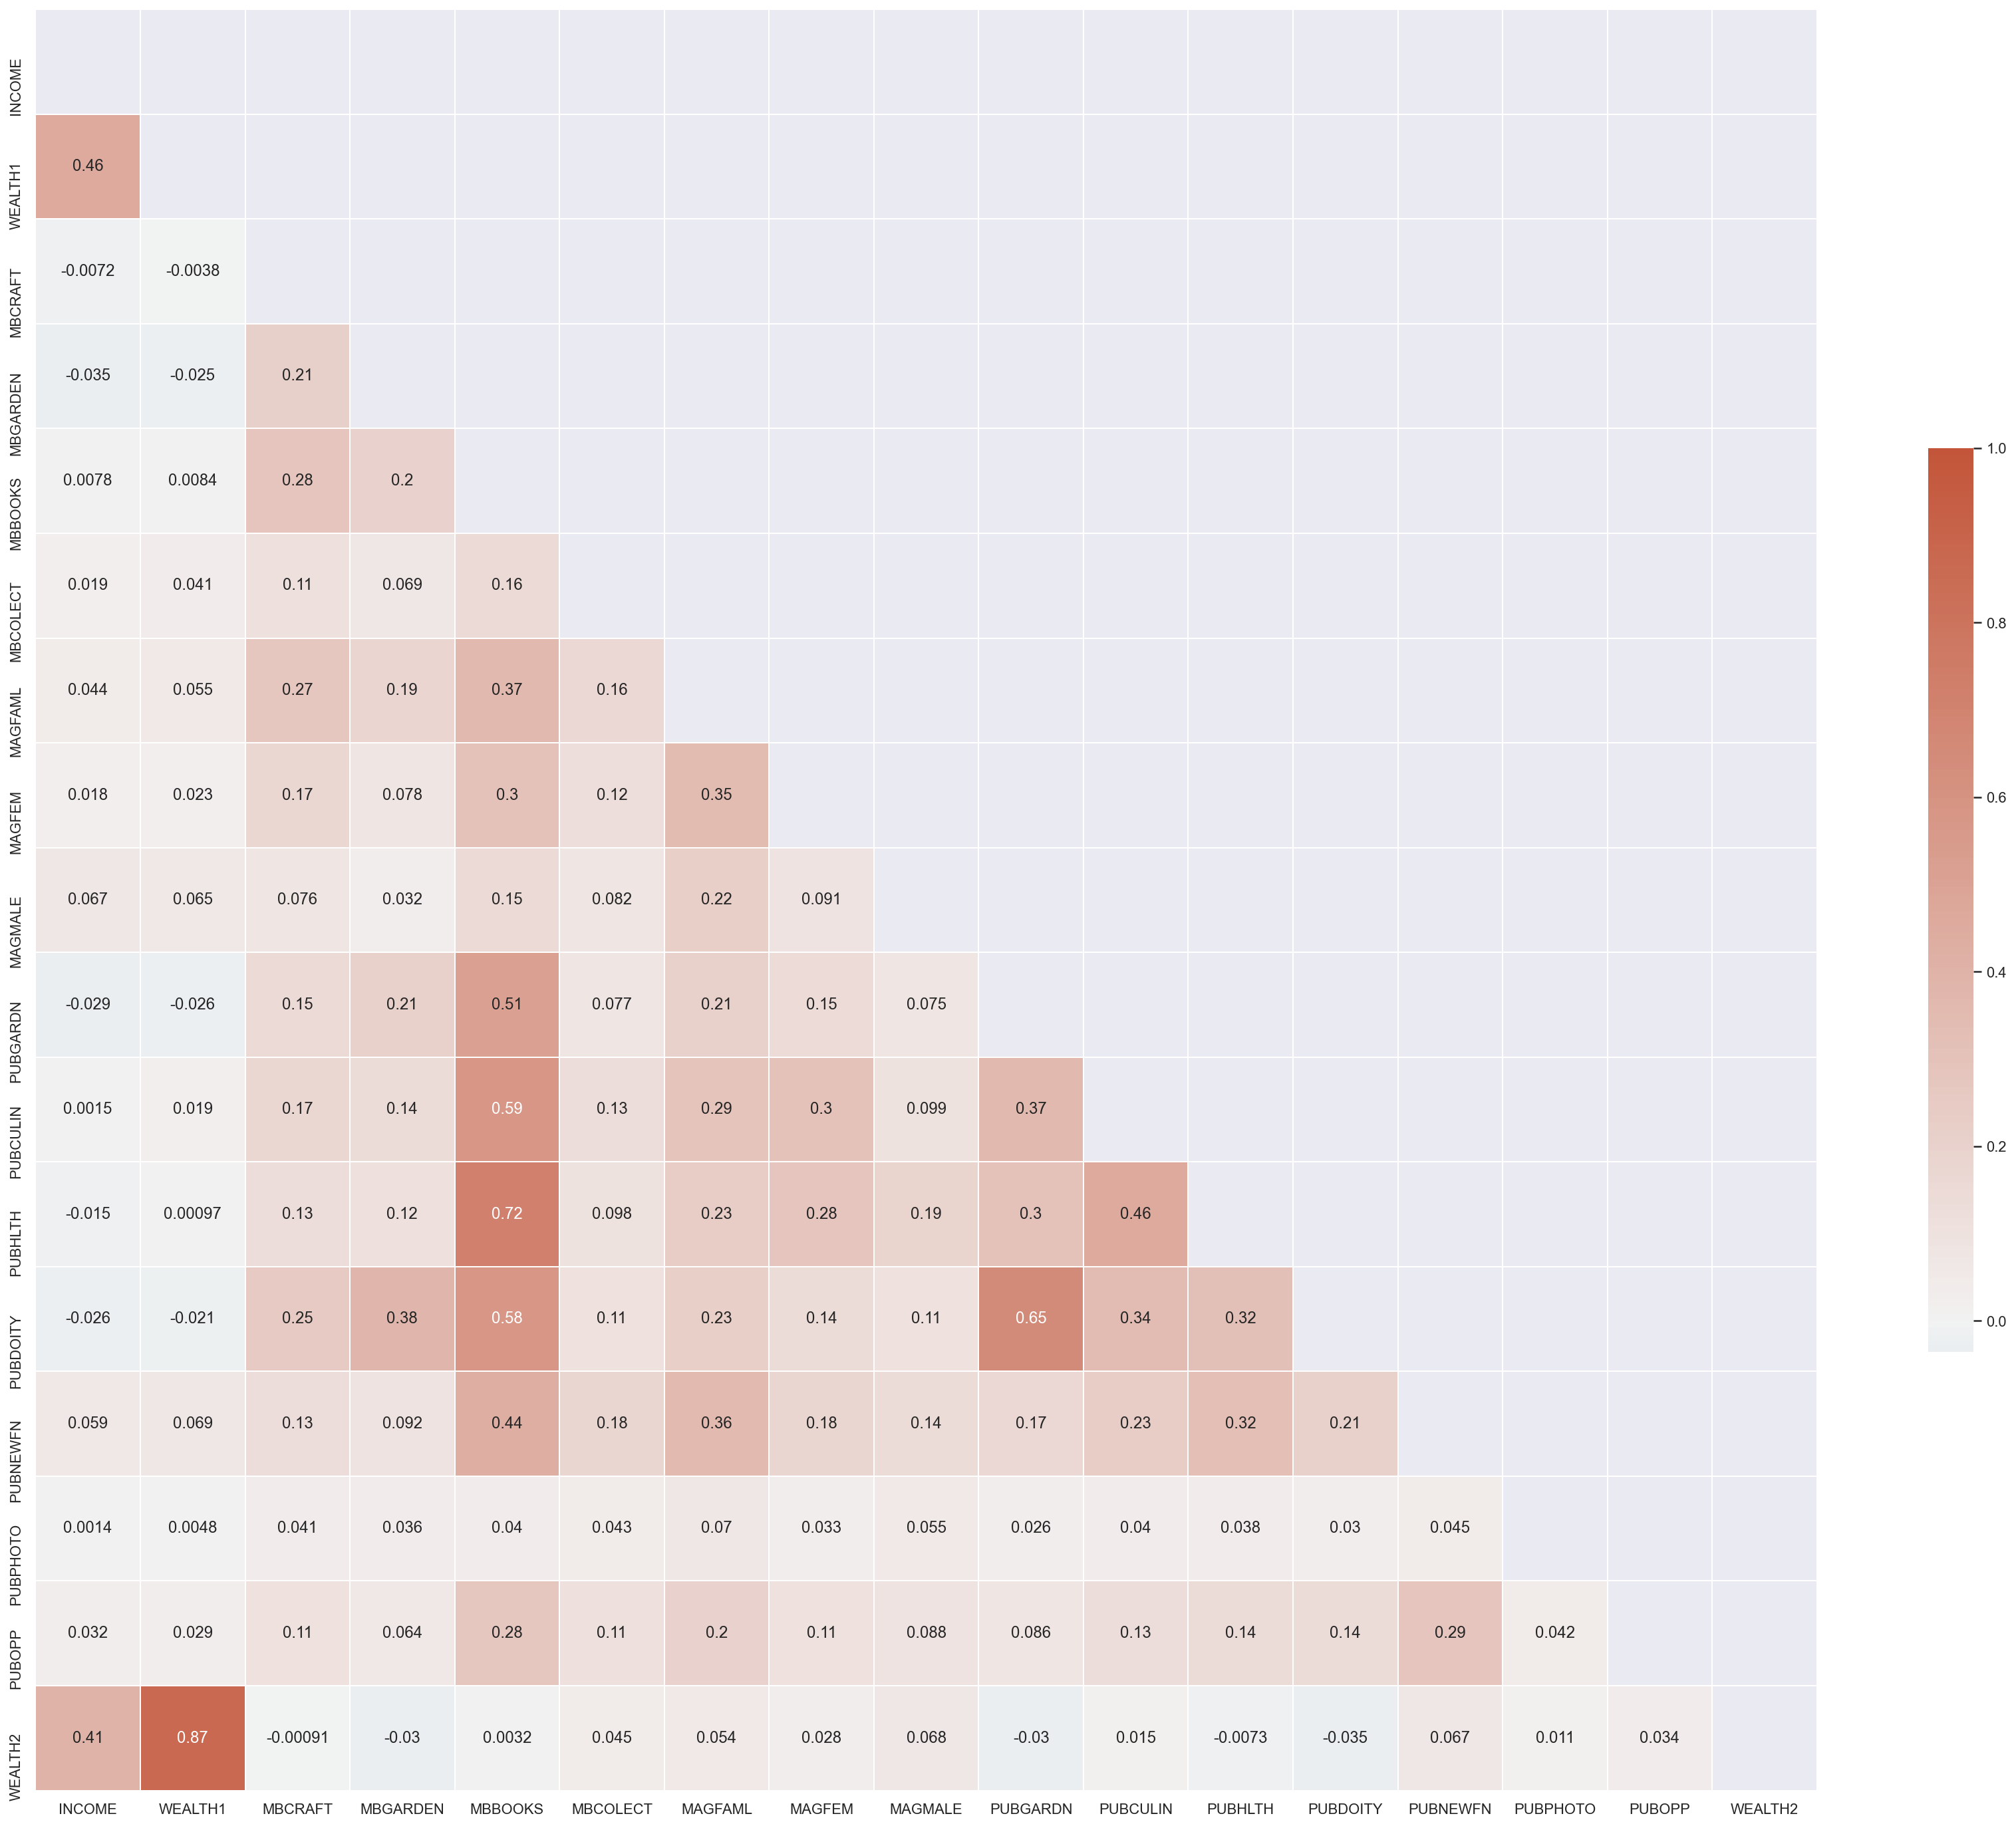

In [70]:
sns.set_theme()
corr = prov_data[remaining_missing_2.index].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [71]:
corr2 = prov_data.corr()

In [72]:
print(corr2["WEALTH1"].abs().sum())
print(corr2["WEALTH2"].abs().sum())

66.13627219438473
58.95450082267199


In [73]:
#Drop wealth1 since it's the most correlated with other variables
prov_data.drop(columns='WEALTH1', inplace=True)

In [74]:
prov_data['AGE'] = (2020-pd.DatetimeIndex(prov_data['DOB']).year)

In [75]:
prov_data['AGE'].isnull().sum()/prov_data.shape[0]

0.2503144258583826

In [76]:
prov_data.drop(columns = 'DOB', inplace=True)

In [77]:
remaining_missing_3 = prov_data.isnull().sum()[prov_data.isnull().sum()>0]

In [78]:
prov_data[remaining_missing_3.index].dtypes

INCOME      float64
MBCRAFT     float64
MBGARDEN    float64
MBBOOKS     float64
MBCOLECT    float64
MAGFAML     float64
MAGFEM      float64
MAGMALE     float64
PUBGARDN    float64
PUBCULIN    float64
PUBHLTH     float64
PUBDOITY    float64
PUBNEWFN    float64
PUBPHOTO    float64
PUBOPP      float64
DATASRCE     object
WEALTH2     float64
LIFESRC      object
AGE         float64
dtype: object

In [79]:
prov_data[['DATASRCE','LIFESRC']].dtypes
prov_data.drop(columns = ['DATASRCE','LIFESRC'])

Unnamed: 0    ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE  \
0               0 2009-01-01     GRI      0    IL  61081                     
1               1 2014-01-01     BOA      1    CA  91326                     
2               2 2010-01-01     AMH      1    NC  27017                     
3               3 2007-01-01     BRY      0    CA  95953                     
4               4 2006-01-01              0    FL  33176                     
...           ...        ...     ...    ...   ...    ...      ...      ...   
95407       95407 2016-01-01     ASE      1    AK  99504                     
95408       95408 2016-01-01     DCD      1    TX  77379                     
95409       95409 2015-01-01     MBC      1    MI  48910                     
95410       95410 2006-01-01     PRV      0    CA  91320                     
95411       95411 2008-01-01     MCC      2    NC  28409                     

      NOEXCH  RECINHSE  RECP3  RECPGVG  RECSWEEP MDMAUD DOMAIN  HOMEOWNR  \
0          0         0      0        0         0   XXXX     T2         0   
1          0         0      0        0         0   XXXX     S1         1   
2          0         0      0        0         0   XXXX     R2         1   
3          0         0      0        0         0   XXXX     R2         1   
4          0         1      1        0         0   XXXX     S2         1   
...      ...       ...    ...      ...       ...    ...    ...       ...   
95407      0         0      0        0         0   XXXX     C2         0   
95408      0         0      0        0         0   XXXX     C1         1   
95409      0         0      1        0         0   XXXX     C3         0   
95410      0         1      0        0         0   XXXX     C1         1   
95411      0         1      0        1         0   C1CM     C1         1   

      CHILD03 CHILD07 CHILD12 CHILD18  NUMCHLD  INCOME GENDER  HIT  MBCRAFT  \
0                                          0.0     NaN      F    0      NaN   
1                                   M      1.0     6.0      M   16      0.0   
2                                          0.0     3.0      M    2      0.0   
3                                          0.0     1.0      F    2      0.0   
4                                          1.0     3.0      F   60      1.0   
...       ...     ...     ...     ...      ...     ...    ...  ...      ...   
95407                                      0.0     NaN      M    0      NaN   
95408                               M      1.0     7.0      M    1      0.0   
95409                                      0.0     NaN      M    0      NaN   
95410                                      0.0     7.0      F    0      NaN   
95411                                      0.0     5.0      F    3      0.0   

       MBGARDEN  MBBOOKS  MBCOLECT  MAGFAML  MAGFEM  MAGMALE  PUBGARDN  \
0           NaN      NaN       NaN      NaN     NaN      NaN       NaN   
1           0.0      3.0       1.0      1.0     1.0      0.0       0.0   
2           0.0      1.0       0.0      0.0     0.0      0.0       0.0   
3           0.0      0.0       0.0      0.0     0.0      0.0       0.0   
4           0.0      9.0       0.0      4.0     1.0      0.0       0.0   
...         ...      ...       ...      ...     ...      ...       ...   
95407       NaN      NaN       NaN      NaN     NaN      NaN       NaN   
95408       0.0      1.0       0.0      0.0     0.0      0.0       0.0   
95409       NaN      NaN       NaN      NaN     NaN      NaN       NaN   
95410       NaN      NaN       NaN      NaN     NaN      NaN       NaN   
95411       0.0      0.0       0.0      1.0     0.0      0.0       0.0   

       PUBCULIN  PUBHLTH  PUBDOITY  PUBNEWFN  PUBPHOTO  PUBOPP  MALEMILI  \
0           NaN      NaN       NaN       NaN       NaN     NaN      0.00   
1           0.0      2.0       0.0       3.0       0.0     0.0      0.00   
2           0.0      1.0       0.0       0.0       0.0     0.0      0.00   
3           0.0

## NEW, data for clustering

In [80]:
#Data that will be used for clustering
clust_data = prov_data[["ODATEDW", "AGE", "DOMAIN", "NUMCHLD","INCOME","HIT","MALEMILI","MALEVET","VIETVETS","WWIIVETS","MAJOR","WEALTH2","CARDPROM","MAXADATE","NUMPROM","CARDPM12","NUMPRM12","RAMNTALL","NGIFTALL","CARDGIFT","MINRAMNT","MINRDATE","MAXRAMNT","MAXRDATE","LASTGIFT","LASTDATE","TIMELAG","AVGGIFT","CONTROLN","RFA_2R","RFA_2F","RFA_2A","MDMAUD_R","MDMAUD_F","MDMAUD_A"]]

In [81]:
#Creating new variable TOT_PUBS
#FEATURE ENGENIEERING
clust_data['TOT_PUBS'] = data[['MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP']].sum(axis=1)

In [82]:
clust_data.head()

ODATEDW   AGE DOMAIN  NUMCHLD  INCOME  HIT  MALEMILI  MALEVET  VIETVETS  \
0 2009-01-01  63.0     T2      0.0     NaN    0      0.00     0.39      0.34   
1 2014-01-01  48.0     S1      1.0     6.0   16      0.00     0.15      0.55   
2 2010-01-01   NaN     R2      0.0     3.0    2      0.00     0.20      0.29   
3 2007-01-01  72.0     R2      0.0     1.0    2      0.00     0.23      0.14   
4 2006-01-01  80.0     S2      1.0     3.0   60      0.01     0.28      0.09   

   WWIIVETS  MAJOR  WEALTH2  CARDPROM   MAXADATE  NUMPROM  CARDPM12  NUMPRM12  \
0      0.18      0      5.0        27 2017-02-01       74         6        14   
1      0.11      0      9.0        12 2017-02-01       32         6        13   
2      0.33      0      1.0        26 2017-02-01       63         6        14   
3      0.31      0      0.0        27 2017-02-01       66         6        14   
4      0.53      0      NaN        43 2017-02-01      113        10        25   

   RAMNTALL  NGIFTALL  CARDGIFT  MINRAMNT   MINRDATE  MAXRAMNT   MAXRDATE  \
0     240.0        31        14       5.0 2012-08-01      12.0 2014-02-01   
1      47.0         3         1      10.0 2013-10-01      25.0 2015-12-01   
2     202.0        27        14       2.0 2011-11-01      16.0 2012-07-01   
3     109.0        16         7       2.0 2007-11-01      11.0 2014-11-01   
4     254.0        37         8       3.0 2013-10-01      15.0 2016-01-01   

   LASTGIFT   LASTDATE  TIMELAG    AVGGIFT  CONTROLN RFA_2R  RFA_2F RFA_2A  \
0      10.0 2015-12-01      4.0   7.741935     95515      L       4      E   
1      25.0 2015-12-01     18.0  15.666667    148535      L       2      G   
2       5.0 2015-12-01     12.0   7.481481     15078      L       4      E   
3      10.0 2015-12-01      9.0   6.812500    172556      L       4      E   
4      15.0 2016-01-01     14.0   6.864865      7112      L       2      F   

  MDMAUD_R MDMAUD_F MDMAUD_A  TOT_PUBS  
0        X        X        X       0.0  
1        X        X        X      11.0  
2        X        X        X       2.0  
3        X        X        X       1.0  
4        X        X        X      21.0

In [83]:
#Defining the date to use as reference
#the most recent date of all datetime64[ns] columns
datetime64 = clust_data.select_dtypes(include = 'datetime64[ns]')
#datetime64
date_now = max(clust_data[datetime64.columns].max())

In [84]:
#transforming the datetime64 columns into float/int
clust_data['DAYS_ODATEDW']= (date_now-clust_data['ODATEDW']).dt.days
clust_data['DAYS_MAXADATE']= (date_now-clust_data['MAXADATE']).dt.days
clust_data['DAYS_MINRDATE']= (date_now-clust_data['MINRDATE']).dt.days
clust_data['DAYS_MAXRDATE']= (date_now-clust_data['MAXRDATE']).dt.days
clust_data['DAYS_LASTDATE']= (date_now-clust_data['LASTDATE']).dt.days
clust_data.drop(columns= datetime64 ,inplace=True)

In [85]:
clust_data.drop(columns='DOMAIN', inplace=True)

In [86]:
clust_data.drop(columns= ['MDMAUD_R','MDMAUD_F','MDMAUD_A'], inplace=True)

In [87]:
clust_data.head()

AGE  NUMCHLD  INCOME  HIT  MALEMILI  MALEVET  VIETVETS  WWIIVETS  MAJOR  \
0  63.0      0.0     NaN    0      0.00     0.39      0.34      0.18      0   
1  48.0      1.0     6.0   16      0.00     0.15      0.55      0.11      0   
2   NaN      0.0     3.0    2      0.00     0.20      0.29      0.33      0   
3  72.0      0.0     1.0    2      0.00     0.23      0.14      0.31      0   
4  80.0      1.0     3.0   60      0.01     0.28      0.09      0.53      0   

   WEALTH2  CARDPROM  NUMPROM  CARDPM12  NUMPRM12  RAMNTALL  NGIFTALL  \
0      5.0        27       74         6        14     240.0        31   
1      9.0        12       32         6        13      47.0         3   
2      1.0        26       63         6        14     202.0        27   
3      0.0        27       66         6        14     109.0        16   
4      NaN        43      113        10        25     254.0        37   

   CARDGIFT  MINRAMNT  MAXRAMNT  LASTGIFT  TIMELAG    AVGGIFT  CONTROLN  \
0        14       5.0      12.0      10.0      4.0   7.741935     95515   
1         1      10.0      25.0      25.0     18.0  15.666667    148535   
2        14       2.0      16.0       5.0     12.0   7.481481     15078   
3         7       2.0      11.0      10.0      9.0   6.812500    172556   
4         8       3.0      15.0      15.0     14.0   6.864865      7112   

  RFA_2R  RFA_2F RFA_2A  TOT_PUBS  DAYS_ODATEDW  DAYS_MAXADATE  DAYS_MINRDATE  \
0      L       4      E       0.0          2953              0           1645   
1      L       2      G      11.0          1127              0           1219   
2      L       4      E       2.0          2588              0           1919   
3      L       4      E       1.0          3684              0           3380   
4      L       2      F      21.0          4049              0           1219   

   DAYS_MAXRDATE  DAYS_LASTDATE  
0           1096            428  
1            428            428  
2           1676            428  
3            823            428  
4            397            397

In [88]:
clust_data['RFA_2A'].replace({'D':4,'E':5,'F':6,'G':7}, inplace =True)

In [89]:
clust_data['RFA_3R'] = data['RFA_3'].str[0]
clust_data.drop(columns='RFA_2R', inplace=True)

In [90]:
clust_data['RFA_3R'].replace({'L':2,'F':3,'N':4,'A':5,'S':6,' ': np.NaN}, inplace =True)

In [91]:
clust_data_c = clust_data.copy()

In [92]:
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(clust_data_c)
clust_data_c = pd.DataFrame(scaled_feat, columns = clust_data_c.columns,index=clust_data_c.index)

In [93]:
clust_data_c

AGE   NUMCHLD    INCOME       HIT  MALEMILI   MALEVET  VIETVETS  \
0      0.689655  0.000000       NaN  0.000000  0.000000  0.393939  0.343434   
1      0.517241  0.142857  0.833333  0.066390  0.000000  0.151515  0.555556   
2           NaN  0.000000  0.333333  0.008299  0.000000  0.202020  0.292929   
3      0.793103  0.000000  0.000000  0.008299  0.000000  0.232323  0.141414   
4      0.885057  0.142857  0.333333  0.248963  0.010101  0.282828  0.090909   
...         ...       ...       ...       ...       ...       ...       ...   
95407       NaN  0.000000       NaN  0.000000  0.141414  0.363636  0.474747   
95408  0.540230  0.142857  1.000000  0.004149  0.000000  0.313131  0.434343   
95409  0.678161  0.000000       NaN  0.000000  0.000000  0.181818  0.464646   
95410  0.655172  0.000000  1.000000  0.000000  0.000000  0.282828  0.353535   
95411  0.908046  0.000000  0.666667  0.012448  0.010101  0.333333  0.222222   

       WWIIVETS  MAJOR   WEALTH2  CARDPROM   NUMPROM  CARDPM12  NUMPRM12  \
0      0.181818    0.0  0.555556  0.433333  0.366492  0.315789  0.168831   
1      0.111111    0.0  1.000000  0.183333  0.146597  0.315789  0.155844   
2      0.333333    0.0  0.111111  0.416667  0.308901  0.315789  0.168831   
3      0.313131    0.0  0.000000  0.433333  0.324607  0.315789  0.168831   
4      0.535354    0.0       NaN  0.700000  0.570681  0.526316  0.311688   
...         ...    ...       ...       ...       ...       ...       ...   
95407  0.111111    0.0       NaN  0.083333  0.052356  0.263158  0.142857   
95408  0.191919    0.0       NaN  0.050000  0.031414  0.157895  0.090909   
95409  0.202020    0.0       NaN  0.216667  0.151832  0.368421  0.207792   
95410  0.202020    0.0  0.777778  0.583333  0.643979  0.473684  0.389610   
95411  0.272727    1.0  0.888889  0.516667  0.706806  0.315789  0.441558   

       RAMNTALL  NGIFTALL  CARDGIFT  MINRAMNT  MAXRAMNT  LASTGIFT   TIMELAG  \
0      0.023965  0.127119  0.341463     0.005  0.001401     0.010  0.003676   
1      0.003590  0.008475  0.024390     0.010  0.004004     0.025  0.016544   
2      0.019954  0.110169  0.341463     0.002  0.002202     0.005  0.011029   
3      0.010135  0.063559  0.170732     0.002  0.001201     0.010  0.008272   
4      0.025443  0.152542  0.195122     0.003  0.002002     0.015  0.012868   
...         ...       ...       ...       ...       ...       ...       ...   
95407  0.001267  0.000000  0.000000     0.025  0.004004     0.025  0.004596   
95408  0.000739  0.000000  0.000000     0.020  0.003003     0.020  0.004596   
95409  0.004751  0.025424  0.097561     0.003  0.001001     0.010  0.002757   
95410  0.051204  0.169492  0.439024     0.005  0.003203     0.018  0.003676   
95411  0.397171  0.161017  0.268293     0.010  0.039239     0.100  0.005515   

        AVGGIFT  CONTROLN    RFA_2F    RFA_2A  TOT_PUBS  DAYS_ODATEDW  \
0      0.006465  0.498045  1.000000  0.333333  0.000000      0.588757   
1      0.014399  0.774510  0.333333  1.000000  0.203704      0.220834   
2      0.006204  0.078617  1.000000  0.333333  0.037037      0.515213   
3      0.005534  0.899764  1.000000  0.333333  0.018519      0.736047   
4      0.005586  0.037079  0.333333  0.666667  0.388889      0.809591   
...         ...       ...       ...       ...       ...           ...   
95407  0.023745  0.962399  0.000000  1.000000  0.000000      0.073746   
95408  0.018738  0.639828  0.000000  0.666667  0.018519      0.073746   
95409  0.007009  0.988852  0.666667  0.333333  0.000000      0.147290   
95410  0.010875  0.024466  1.000000  0.666667  0.000000      0.809591   
95411  0.095632  0.965246  0.000000  1.000000  0.037037      0.662503   

       DAYS_MAXADATE  DAYS_MINRDATE  DAYS_MAXRDATE  DAYS_LASTDATE  RFA_3R  
0                0.0       0.207807       0.140621       0.608819    1.00  
1                0.0       0.153992       0.054914       0.608819    0.75  
2                0.0       0.242420       0.215037       0.608819    1.00  
3                0.0

In [94]:
#metric_features_inc.isnull().sum()

In [95]:
a
from sklearn.impute import KNNImputer
data_neighbors = clust_data_c.drop(columns='CONTROLN')
imputer = KNNImputer(n_neighbors=5, weights="uniform")
data_neighbors = imputer.fit_transform(data_neighbors)

NameError: name 'a' is not defined

In [ ]:
columns = clust_data_c.drop(columns='CONTROLN')

In [ ]:
data_neighbors_df = pd.DataFrame(data_neighbors, columns = columns.columns,index=clust_data_c.index)

In [ ]:
data_neighbors_df.to_csv('data_neighbors.csv')
data_neighbors_df.to_excel('data_neighbors.xlsx')

In [ ]:
#data_neighbors[metric_features_inc.columns.tolist()]

In [ ]:
#prov_data[["ODATEDW", "AGE", "DOMAIN", "NUMCHLD","INCOME","HIT","TOT_PUBS","MALEMILI","MALEVET","VIETVETS","WWIIVETS","MAJOR","WEALTH2","CARDPROM","MAXADATE","NUMPROM","CARDPM12","NUMPRM12","RAMNTALL","NGIFTALL","CARDGIFT","MINRAMNT","MINRDATE","MAXRAMNT","MAXRDATE","LASTGIFT","LASTDATE","TIMELAG","AVGGIFT","CONTROLN","RFA_2R","RFA_2F","RFA_2A","MDMAUD_R","MDMAUD_F","MDMAUD_A"]]

In [135]:
data_neighbors_df = pd.read_excel ('data_neighbors.xlsx')

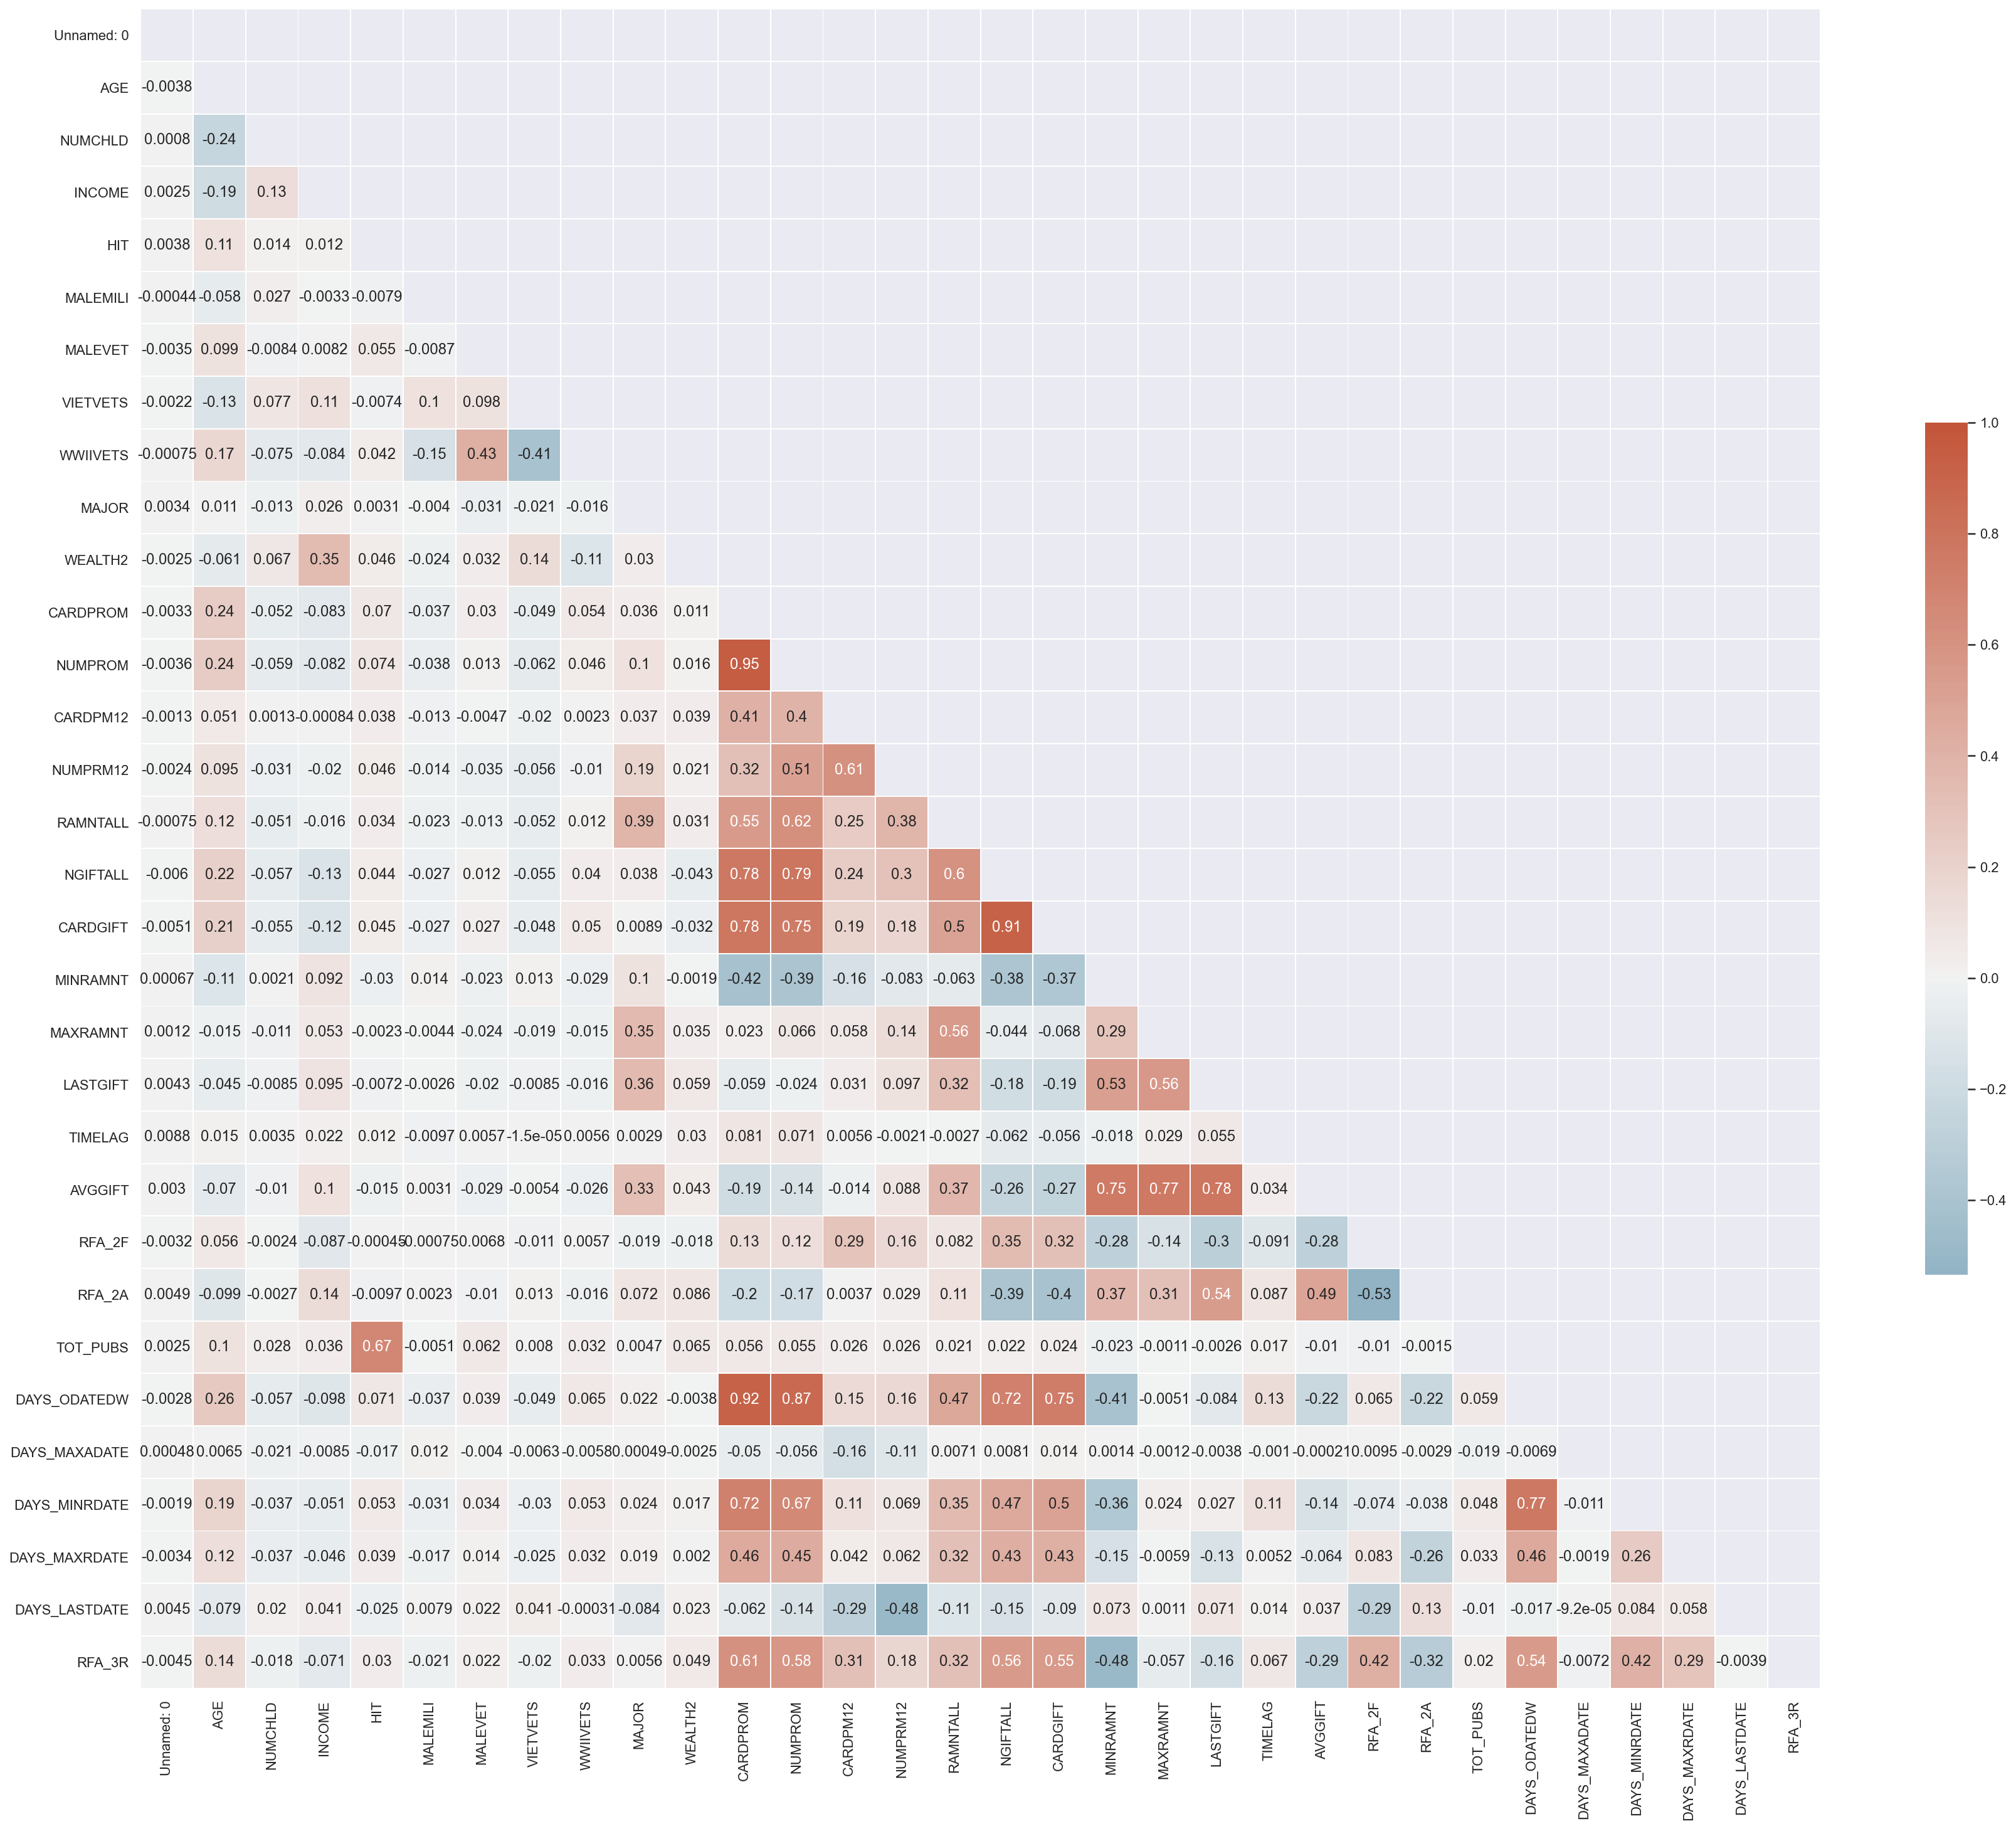

In [136]:
sns.set_theme()
corr = data_neighbors_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [137]:
corr3 = data_neighbors_df.corr()

In [138]:
print(corr3["NUMPROM"].abs().sum())
print(corr3["CARDPROM"].abs().sum())

9.573779077852397
9.418794602939835


In [139]:
#Drop wealth1 since it's the most correlated with other variables
data_neighbors_df.drop(columns='NUMPROM', inplace=True)

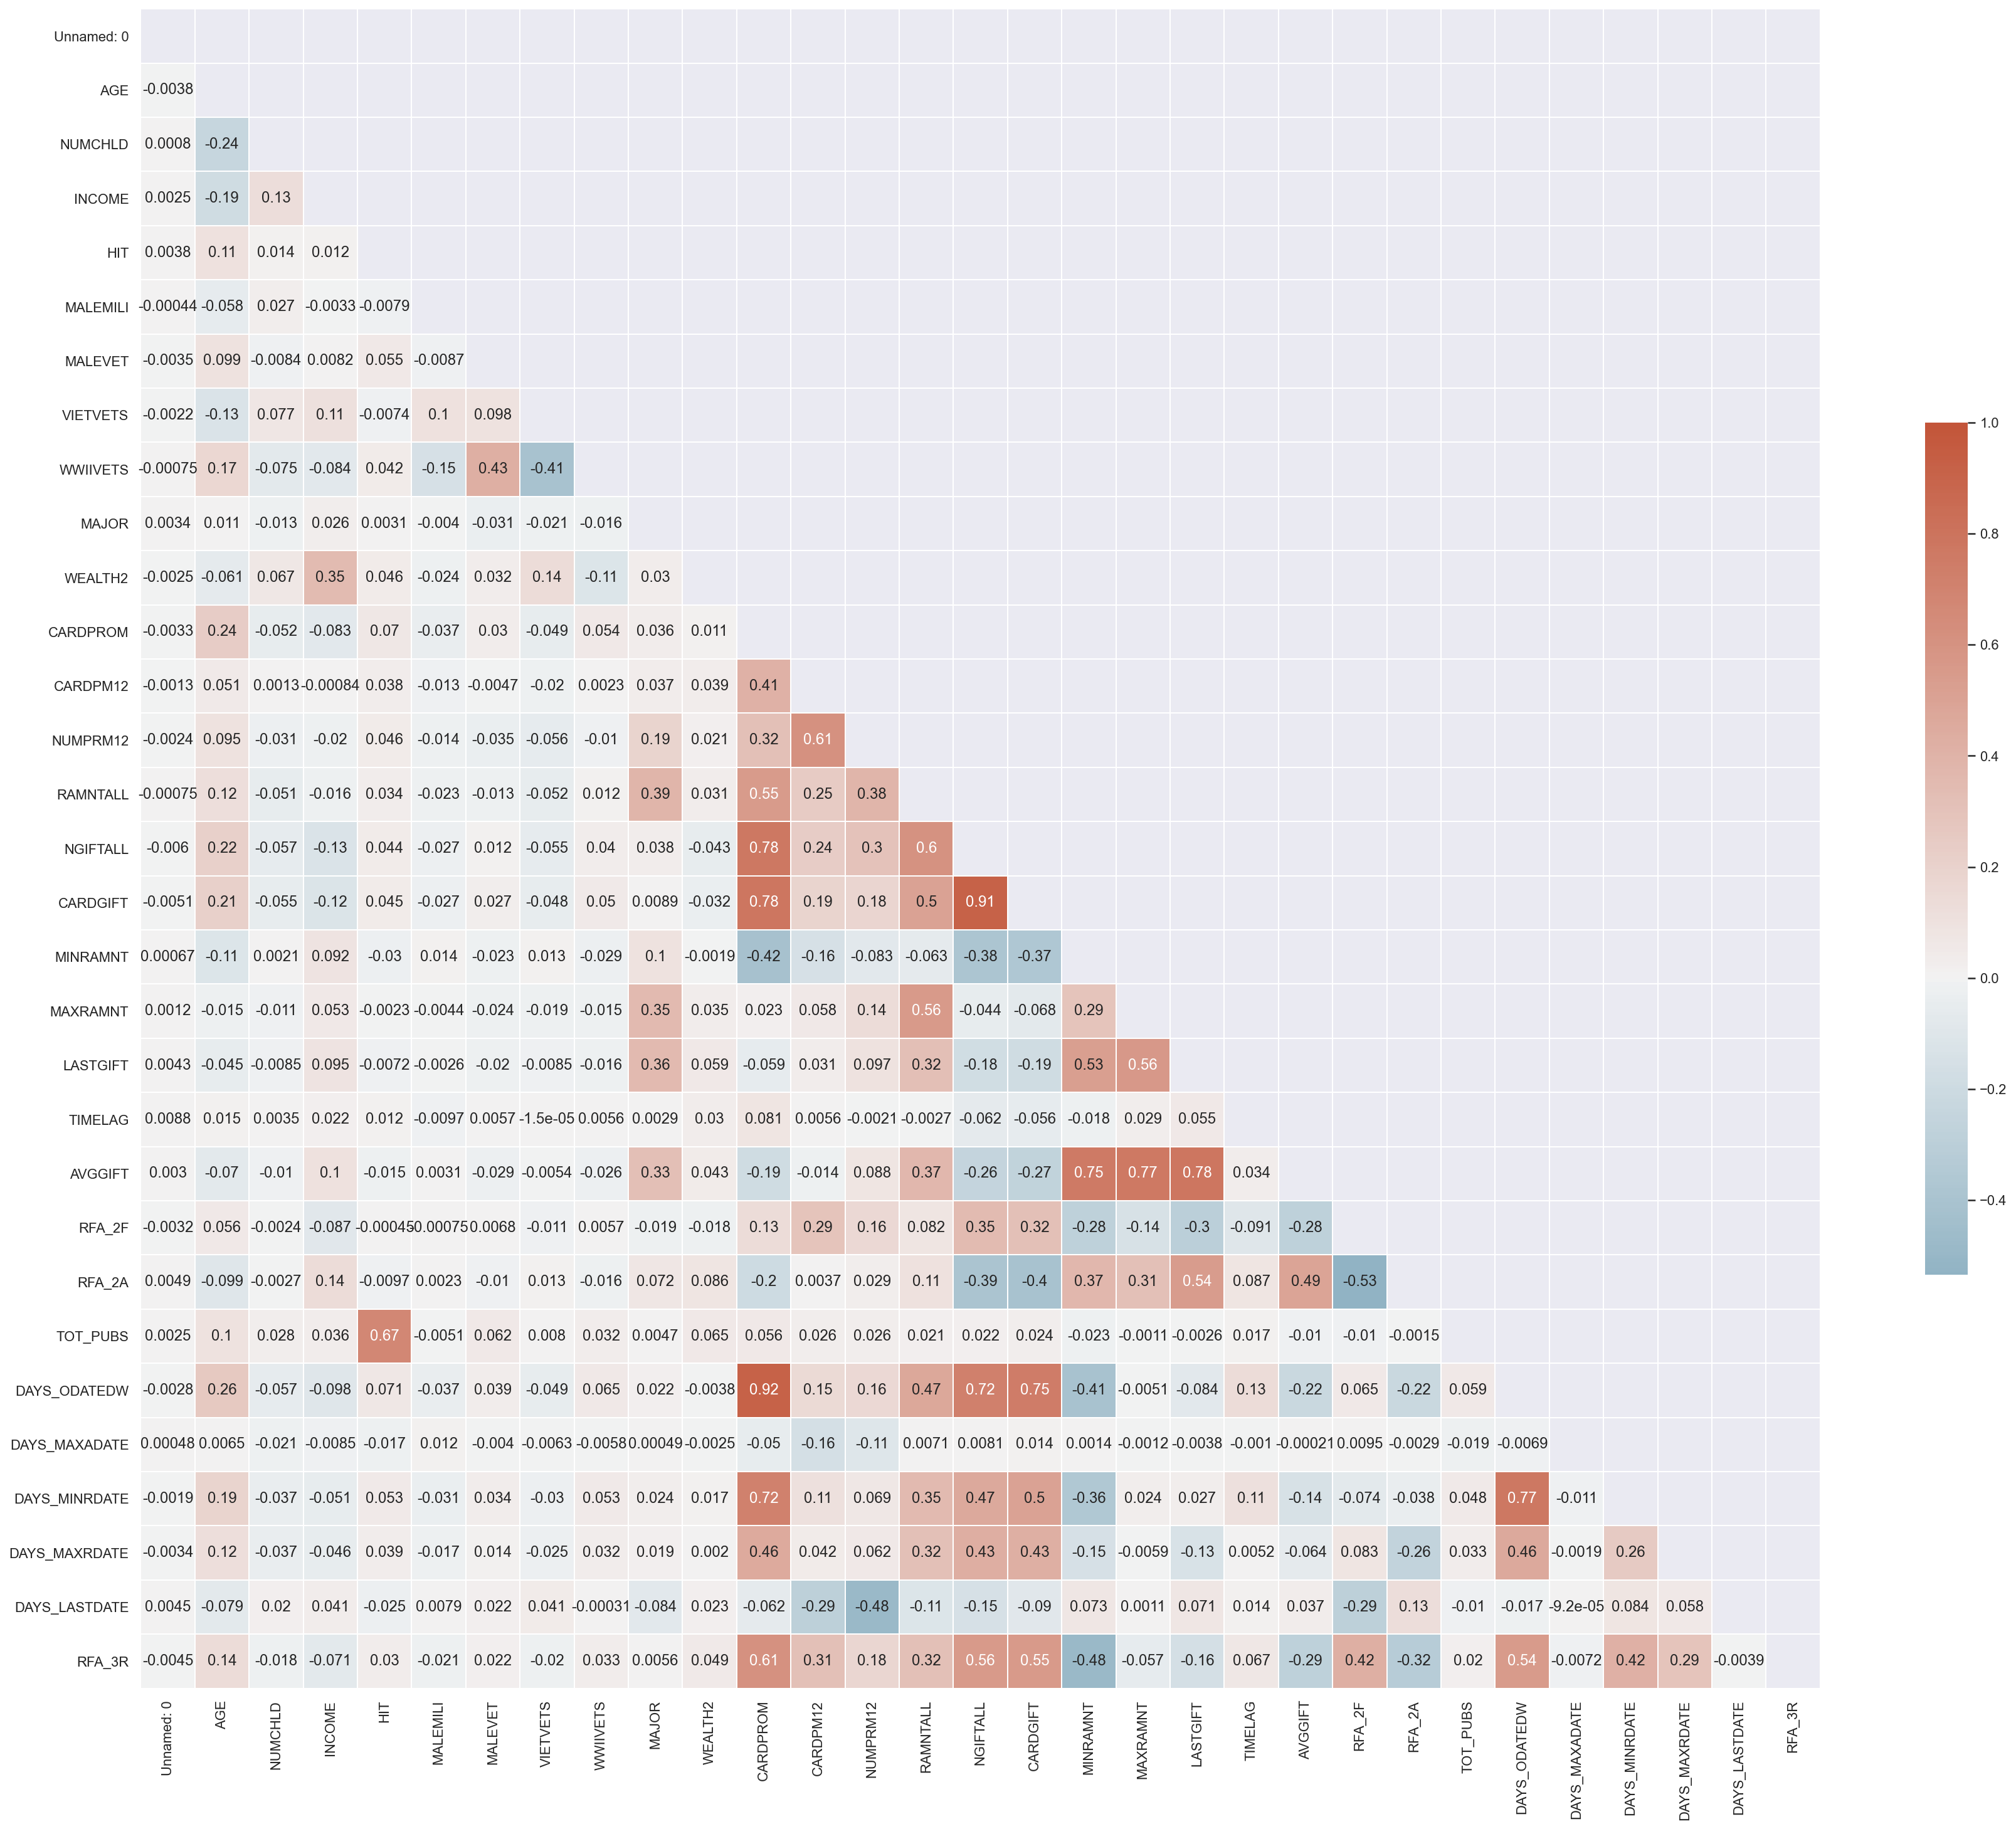

In [140]:
sns.set_theme()
corr = data_neighbors_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [141]:
corr4 = data_neighbors_df.corr()

In [142]:
print(corr4["NGIFTALL"].abs().sum())
print(corr4["CARDGIFT"].abs().sum())

8.517666256165272
8.225263814212795


In [143]:
#Drop wealth1 since it's the most correlated with other variables
data_neighbors_df.drop(columns='NGIFTALL', inplace=True)

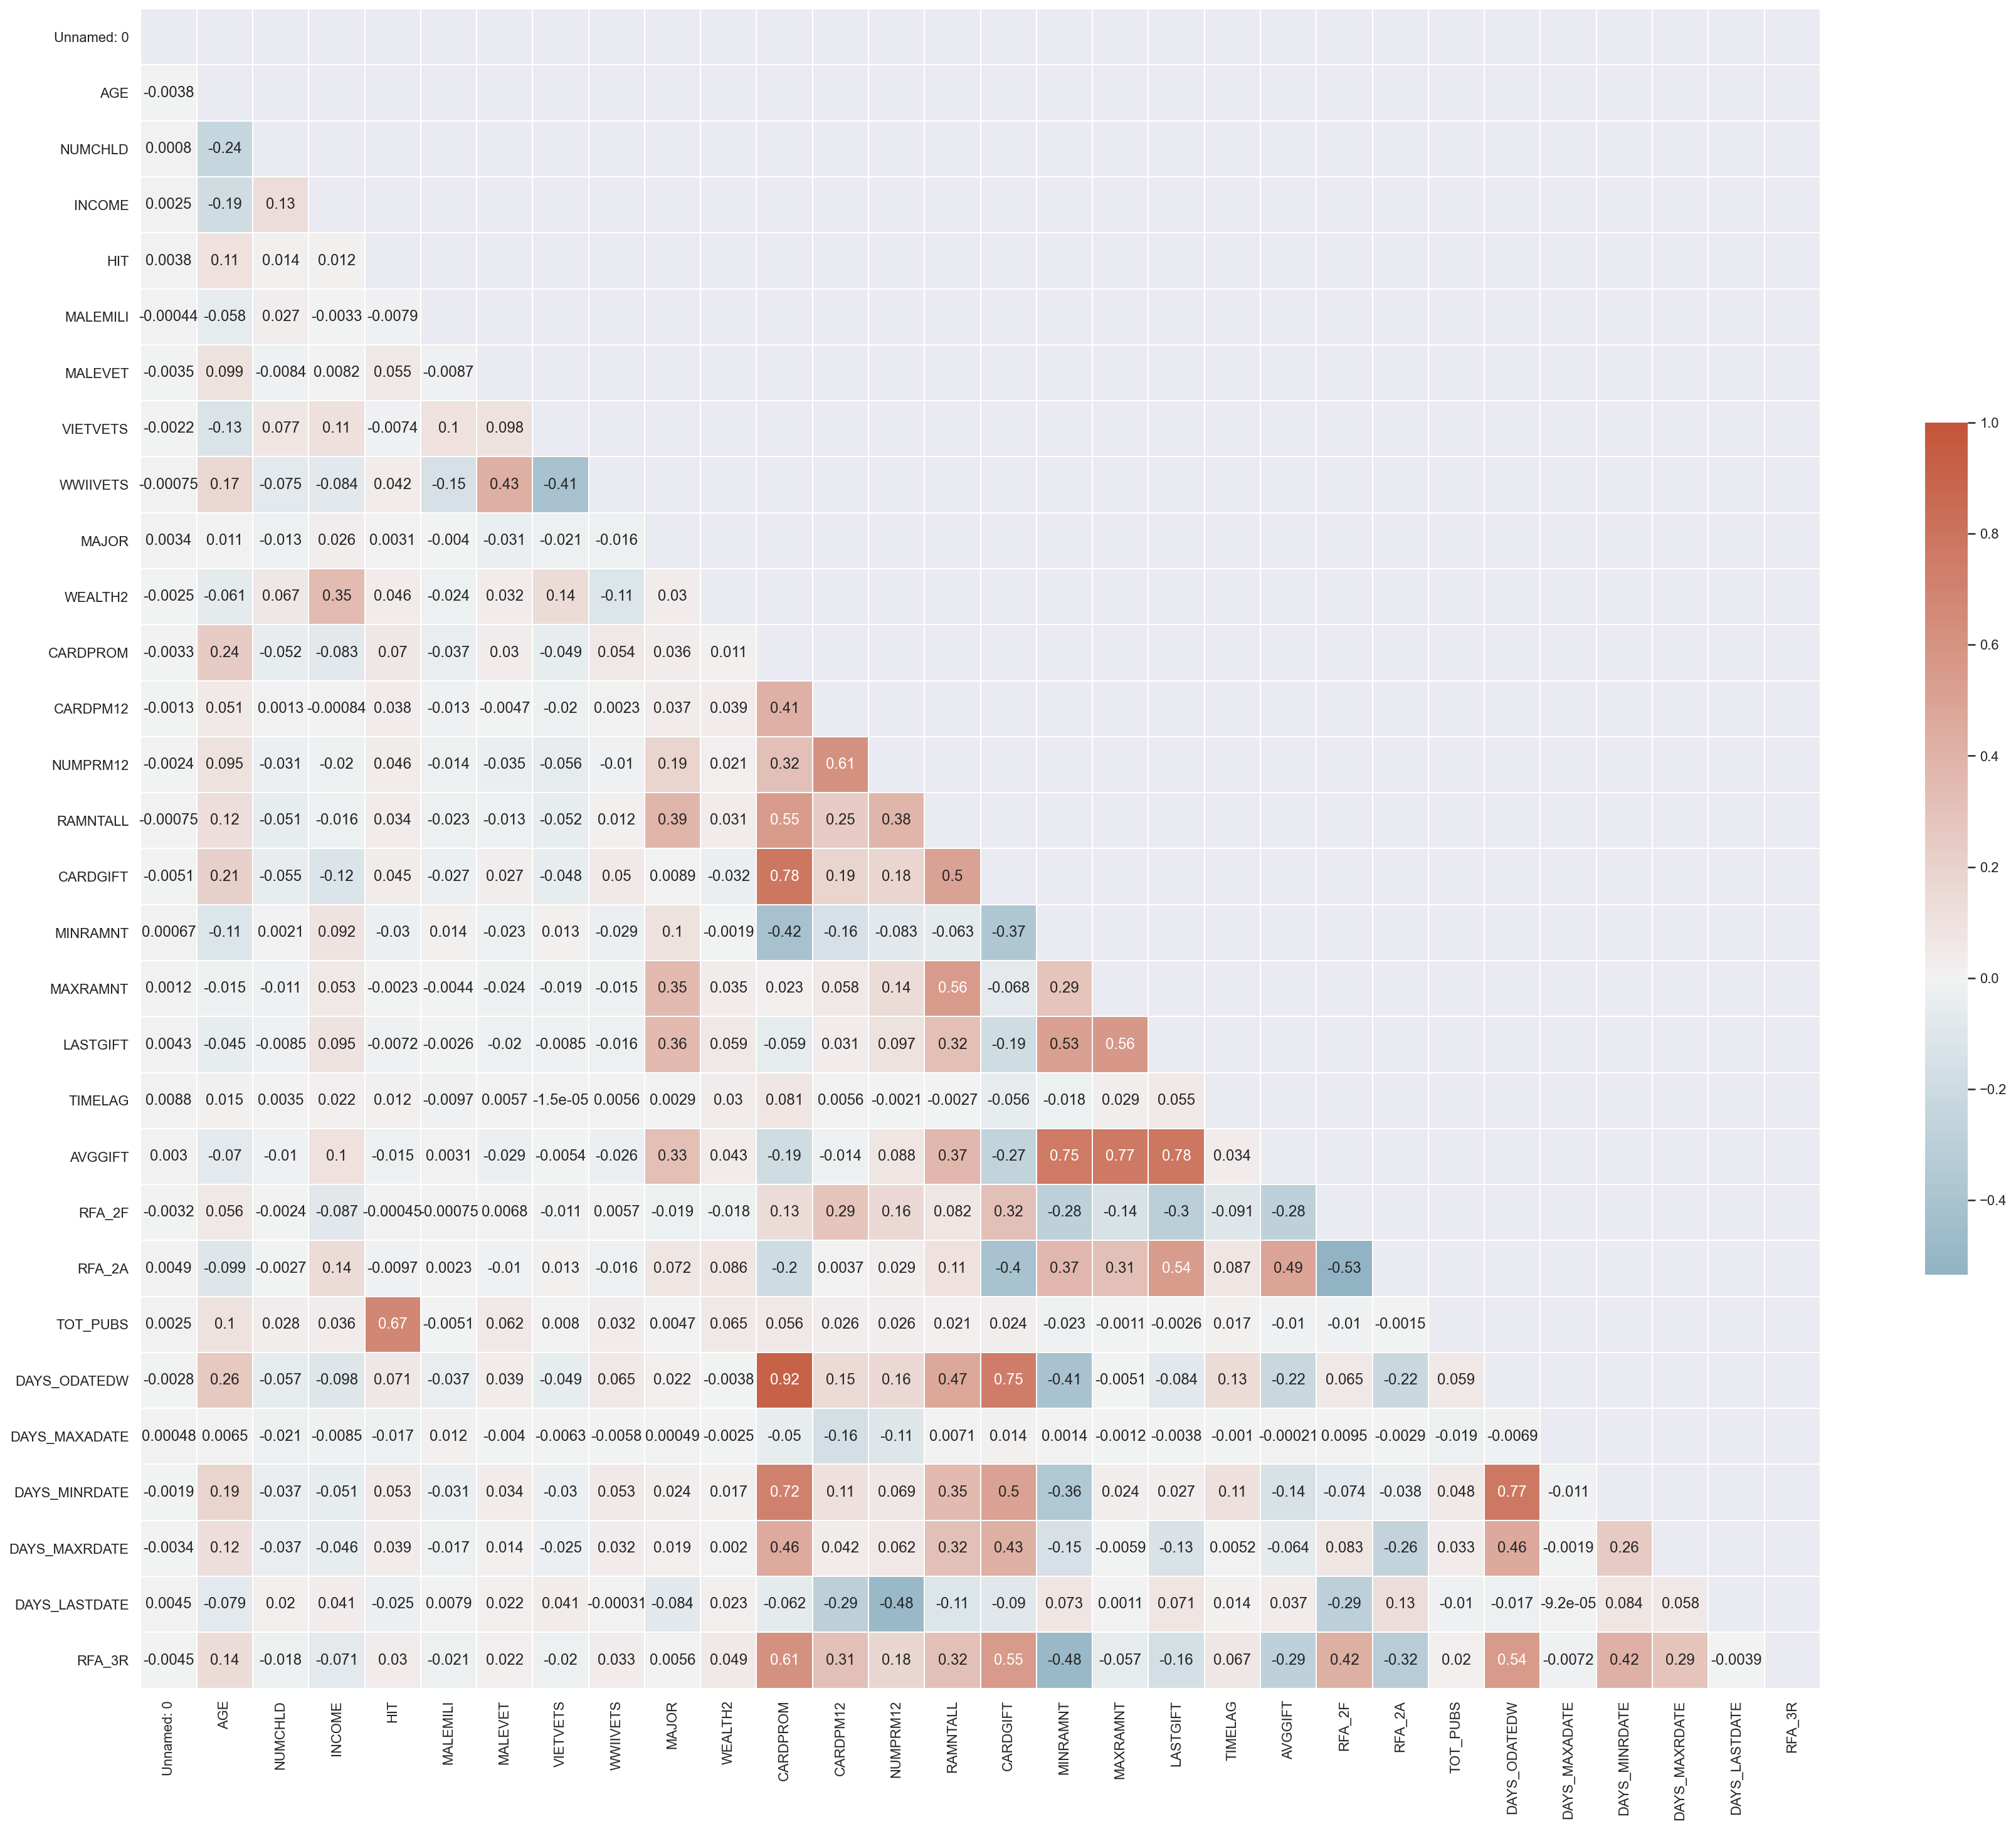

In [144]:
sns.set_theme()
corr = data_neighbors_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [145]:
corr5 = data_neighbors_df.corr()

In [146]:
print(corr5["DAYS_ODATEDW"].abs().sum())
print(corr5["CARDPROM"].abs().sum())

7.142231063953159
7.693956808229776


In [147]:
#Drop the most correlated with other variables
data_neighbors_df.drop(columns='CARDPROM', inplace=True)

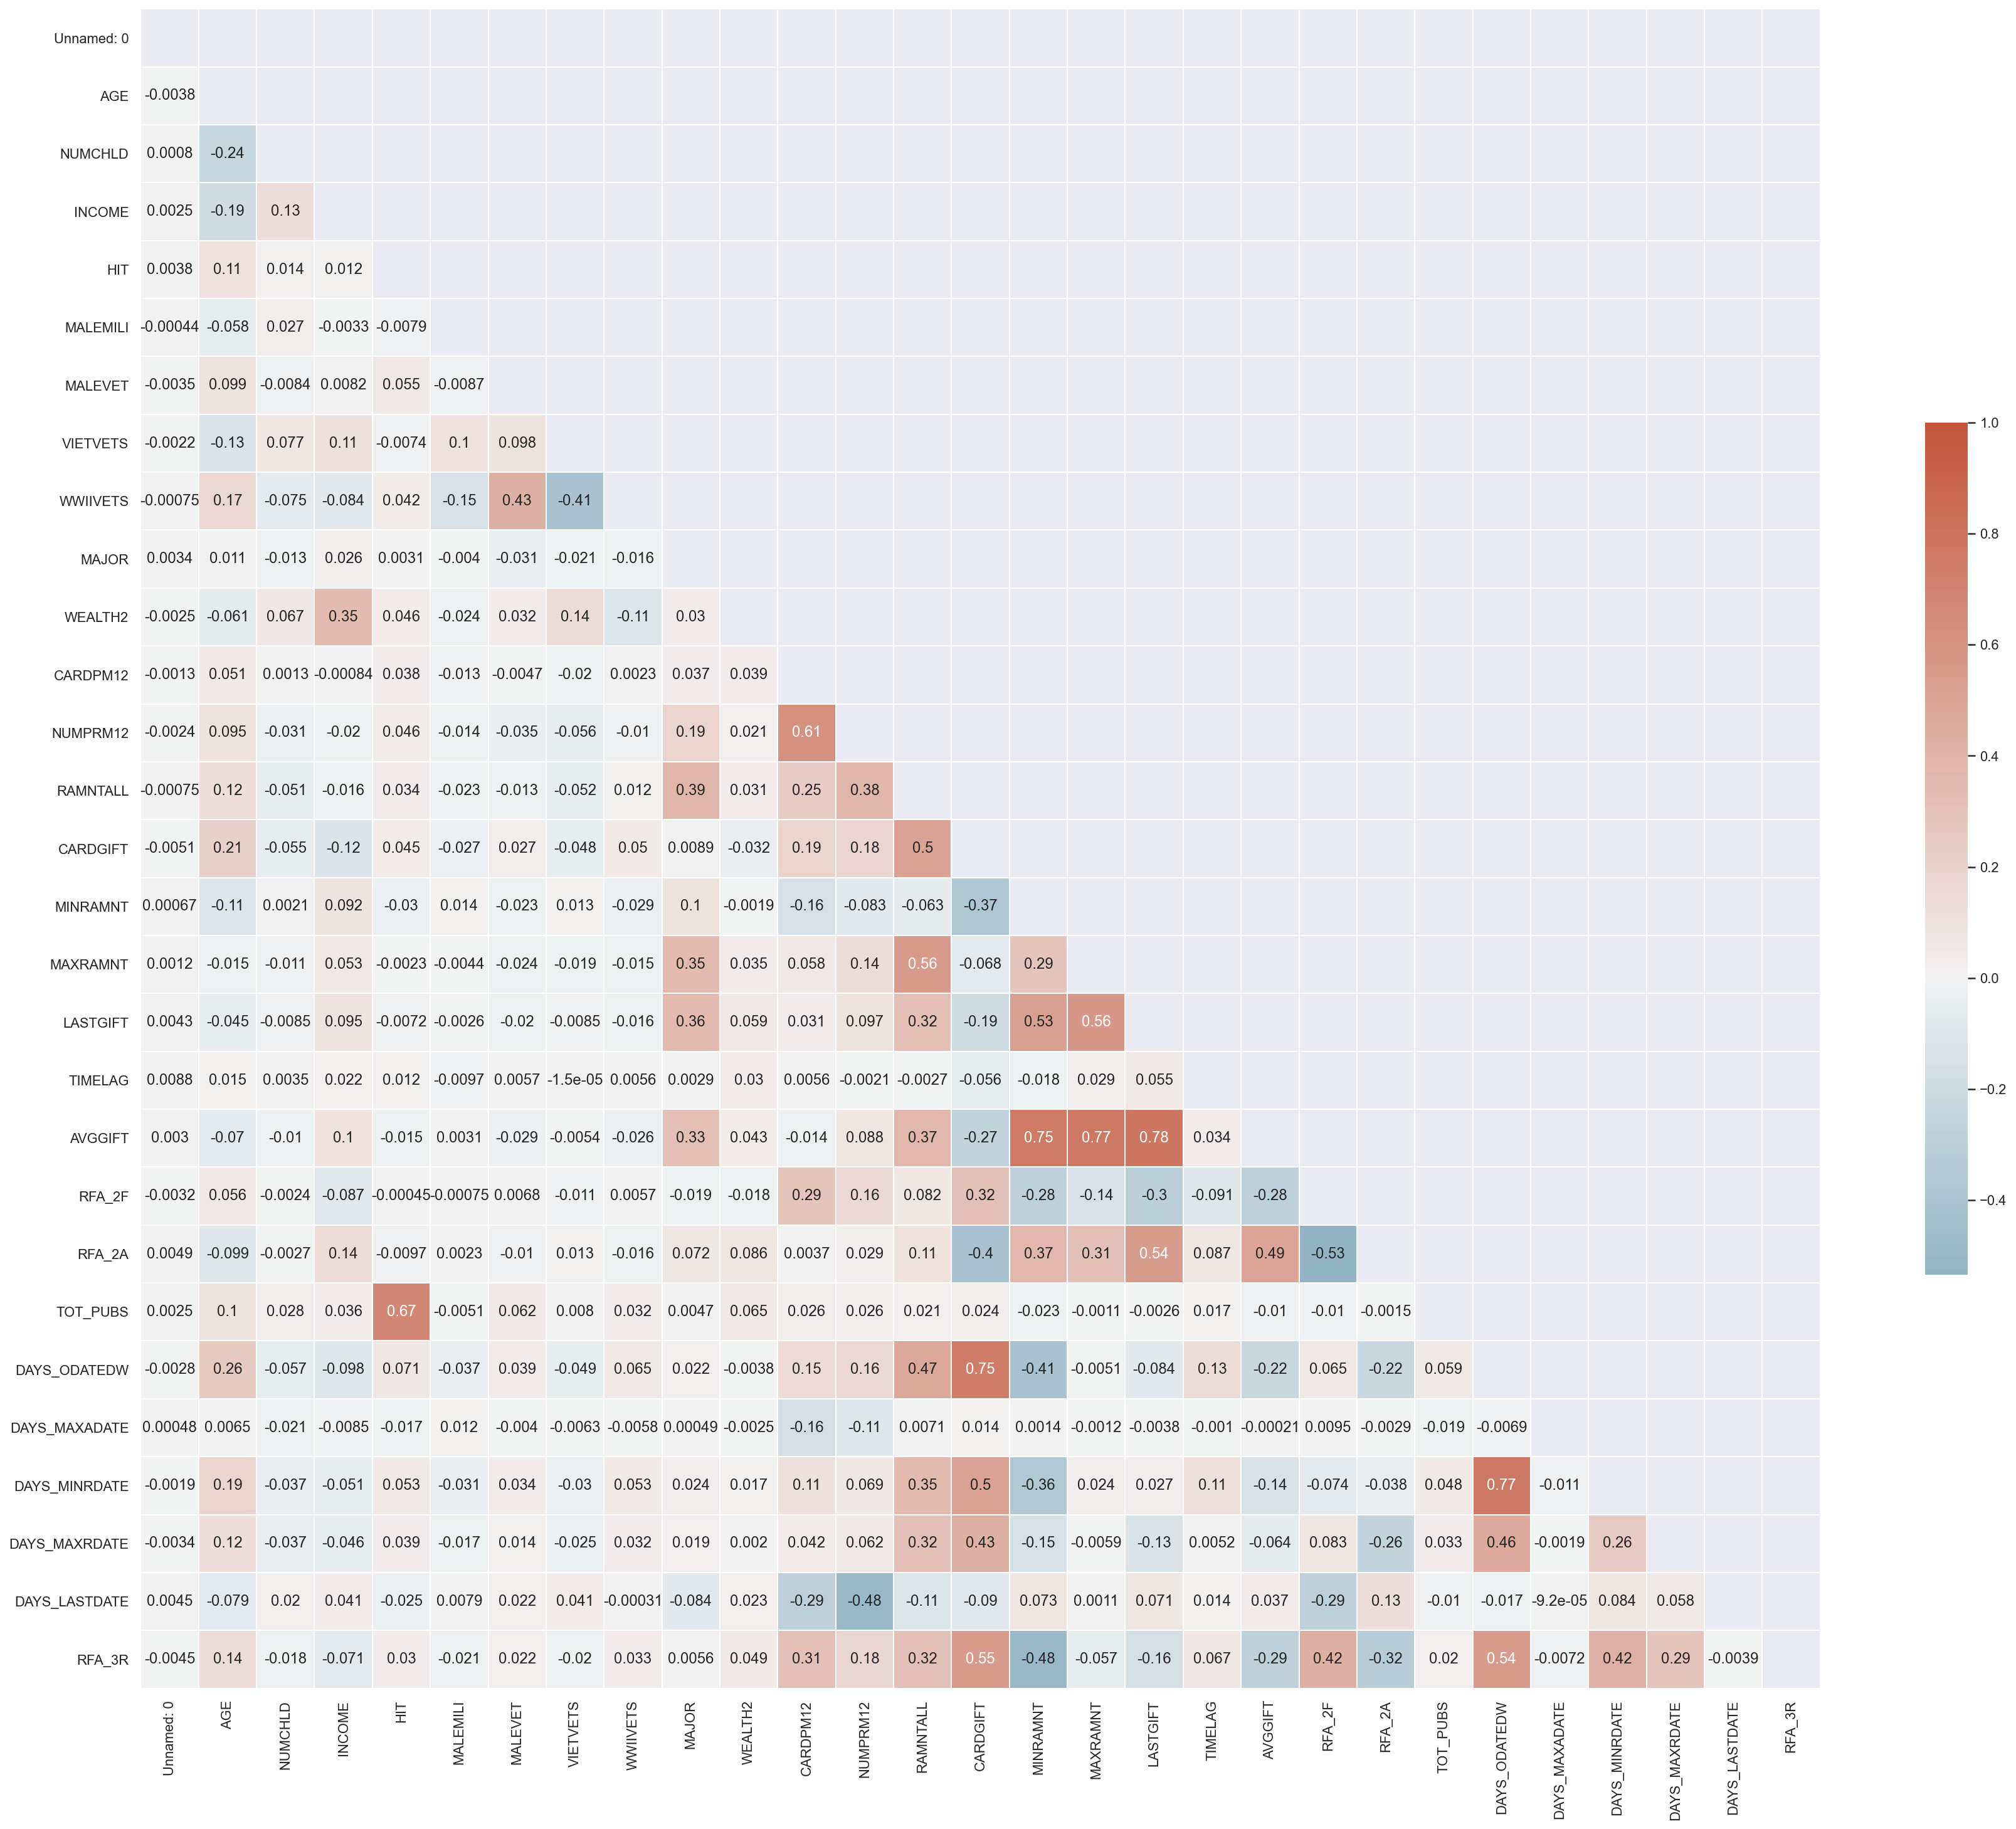

In [148]:
sns.set_theme()
corr = data_neighbors_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [149]:
corr6 = data_neighbors_df.corr()

In [150]:
print(corr5["LASTGIFT"].abs().sum())
print(corr5["AVGGIFT"].abs().sum())

5.582738092181743
6.424485960230403


In [151]:
#Drop the most correlated with other variables
data_neighbors_df.drop(columns='AVGGIFT', inplace=True)

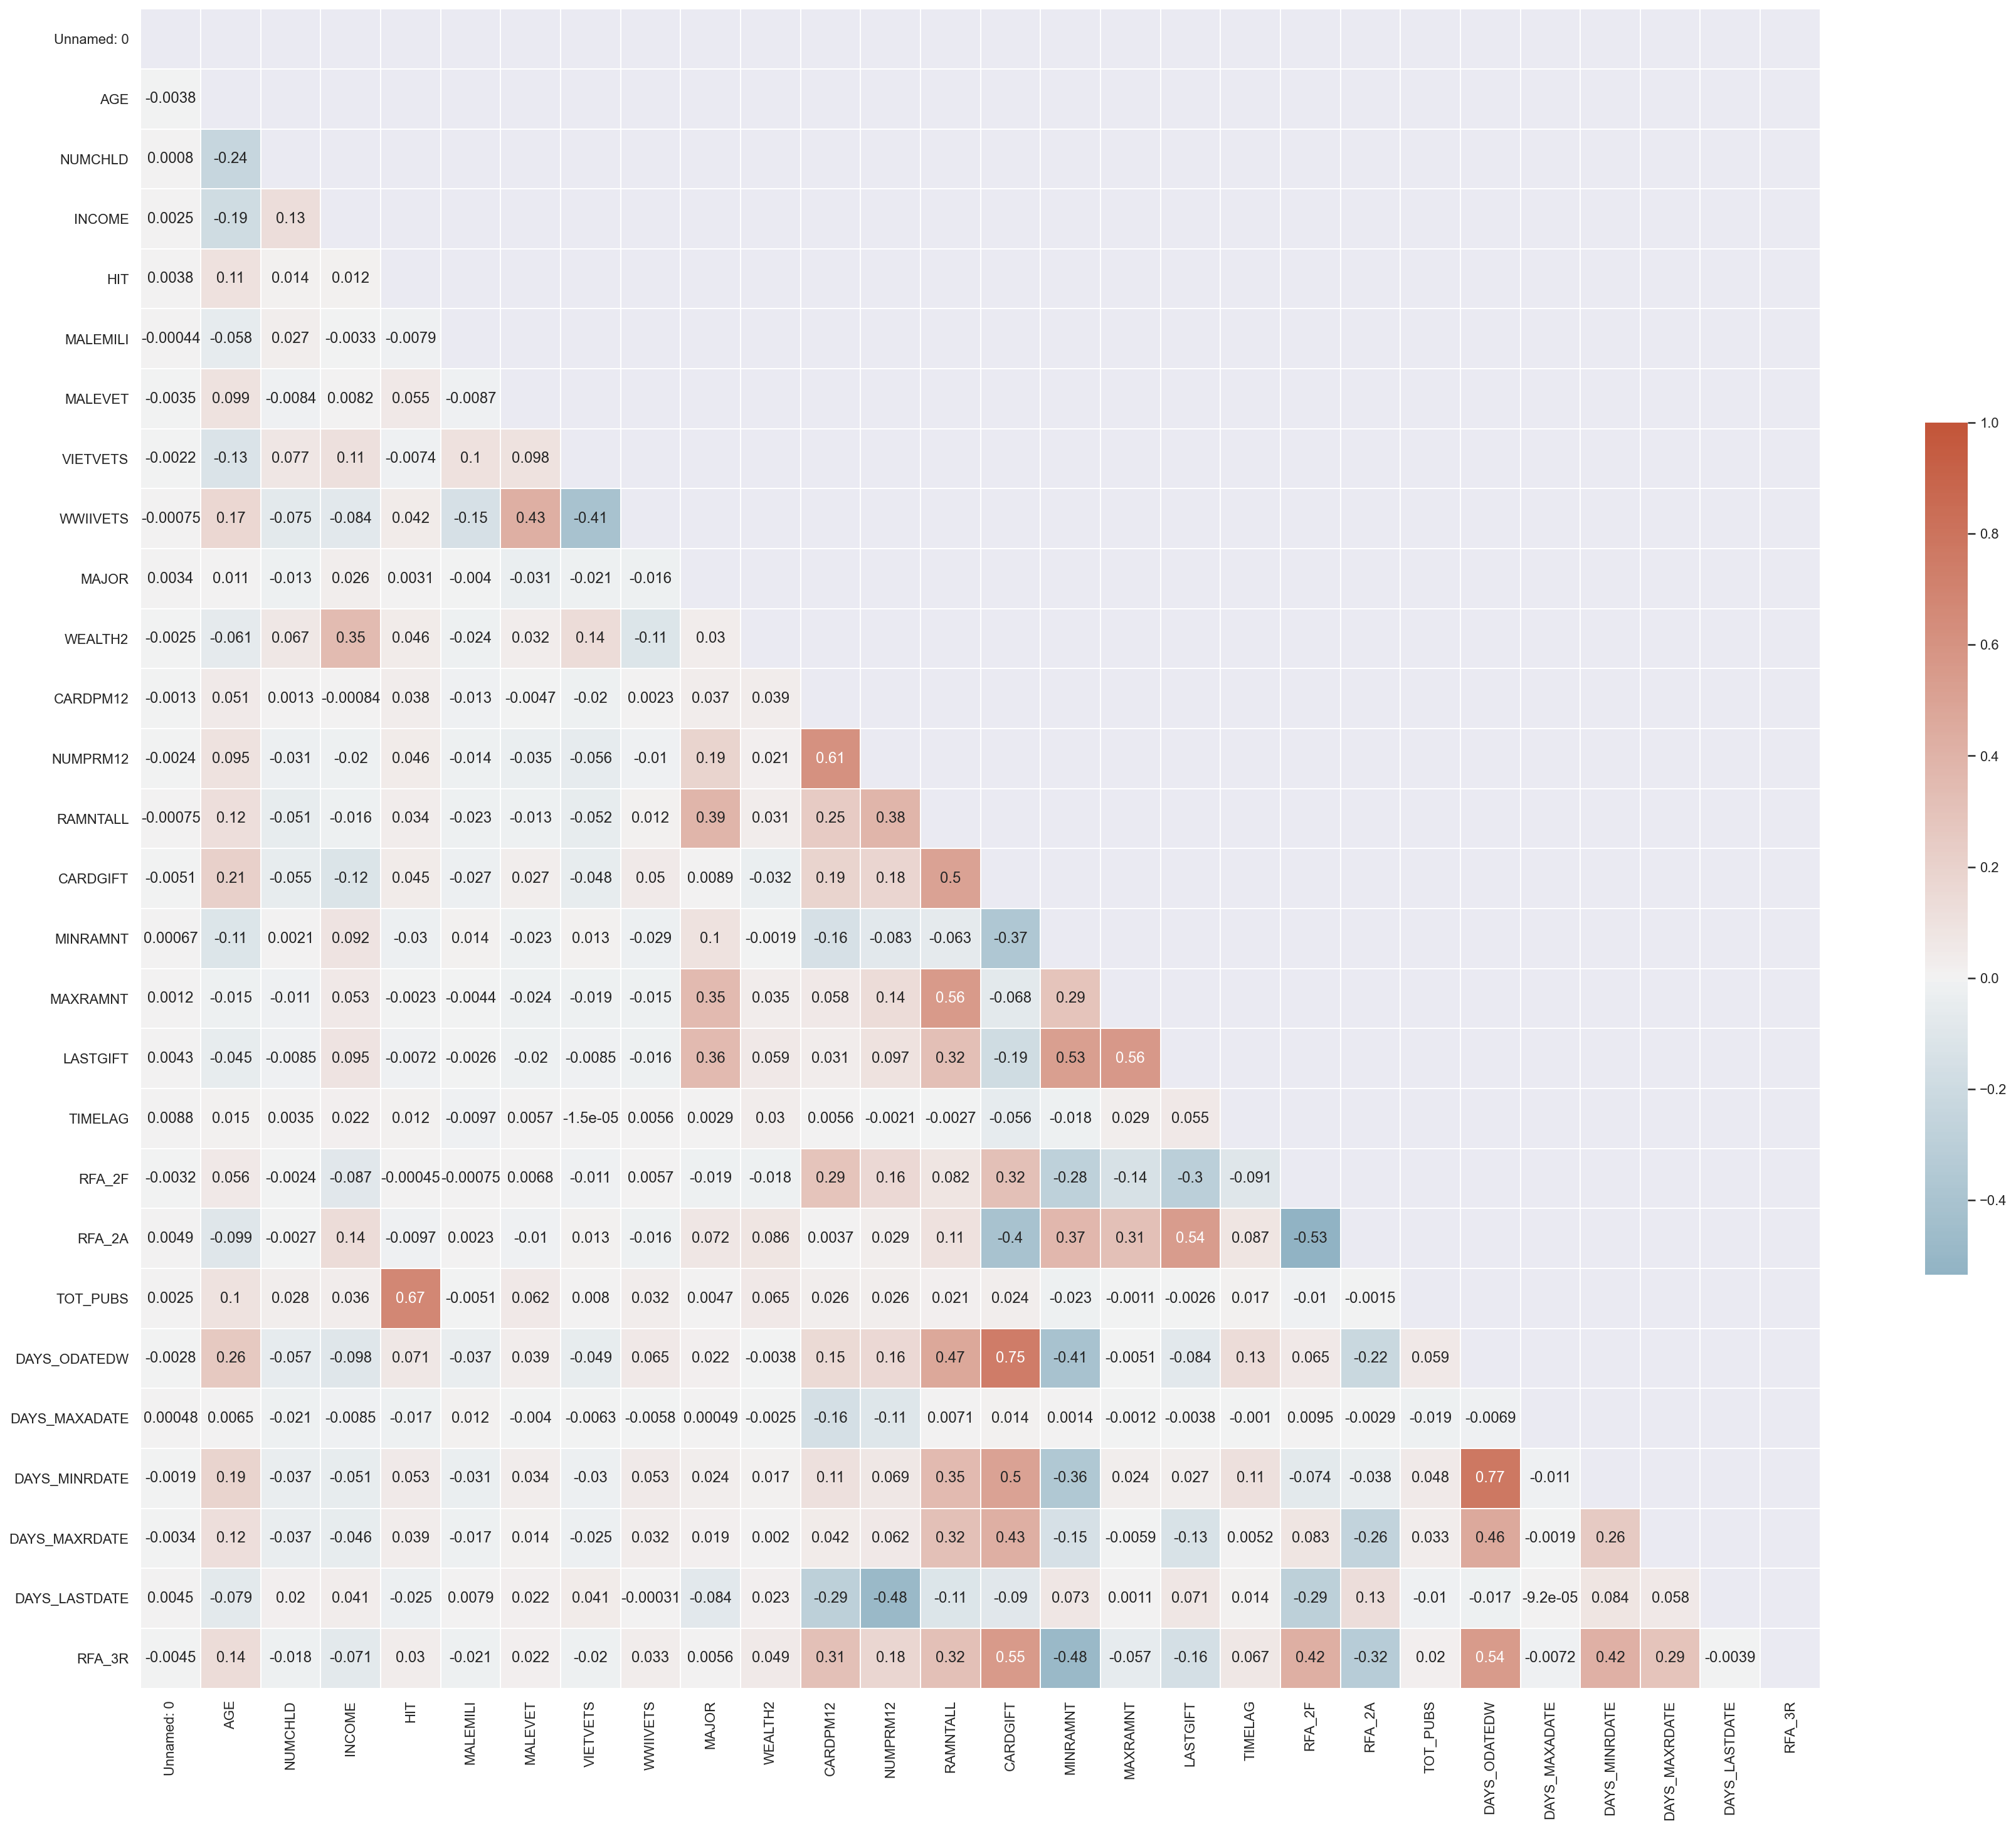

In [152]:
sns.set_theme()
corr = data_neighbors_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [153]:
corr7 = data_neighbors_df.corr()

In [154]:
print(corr7["DAYS_ODATEDW"].abs().sum())
print(corr7["DAYS_MINRDATE"].abs().sum())

6.0052208732109955
4.780070844554816


In [155]:
#Drop the most correlated with other variables
data_neighbors_df.drop(columns='DAYS_ODATEDW', inplace=True)
#data_neighbors_df.drop(columns='DAYS_MINRDATE', inplace=True)

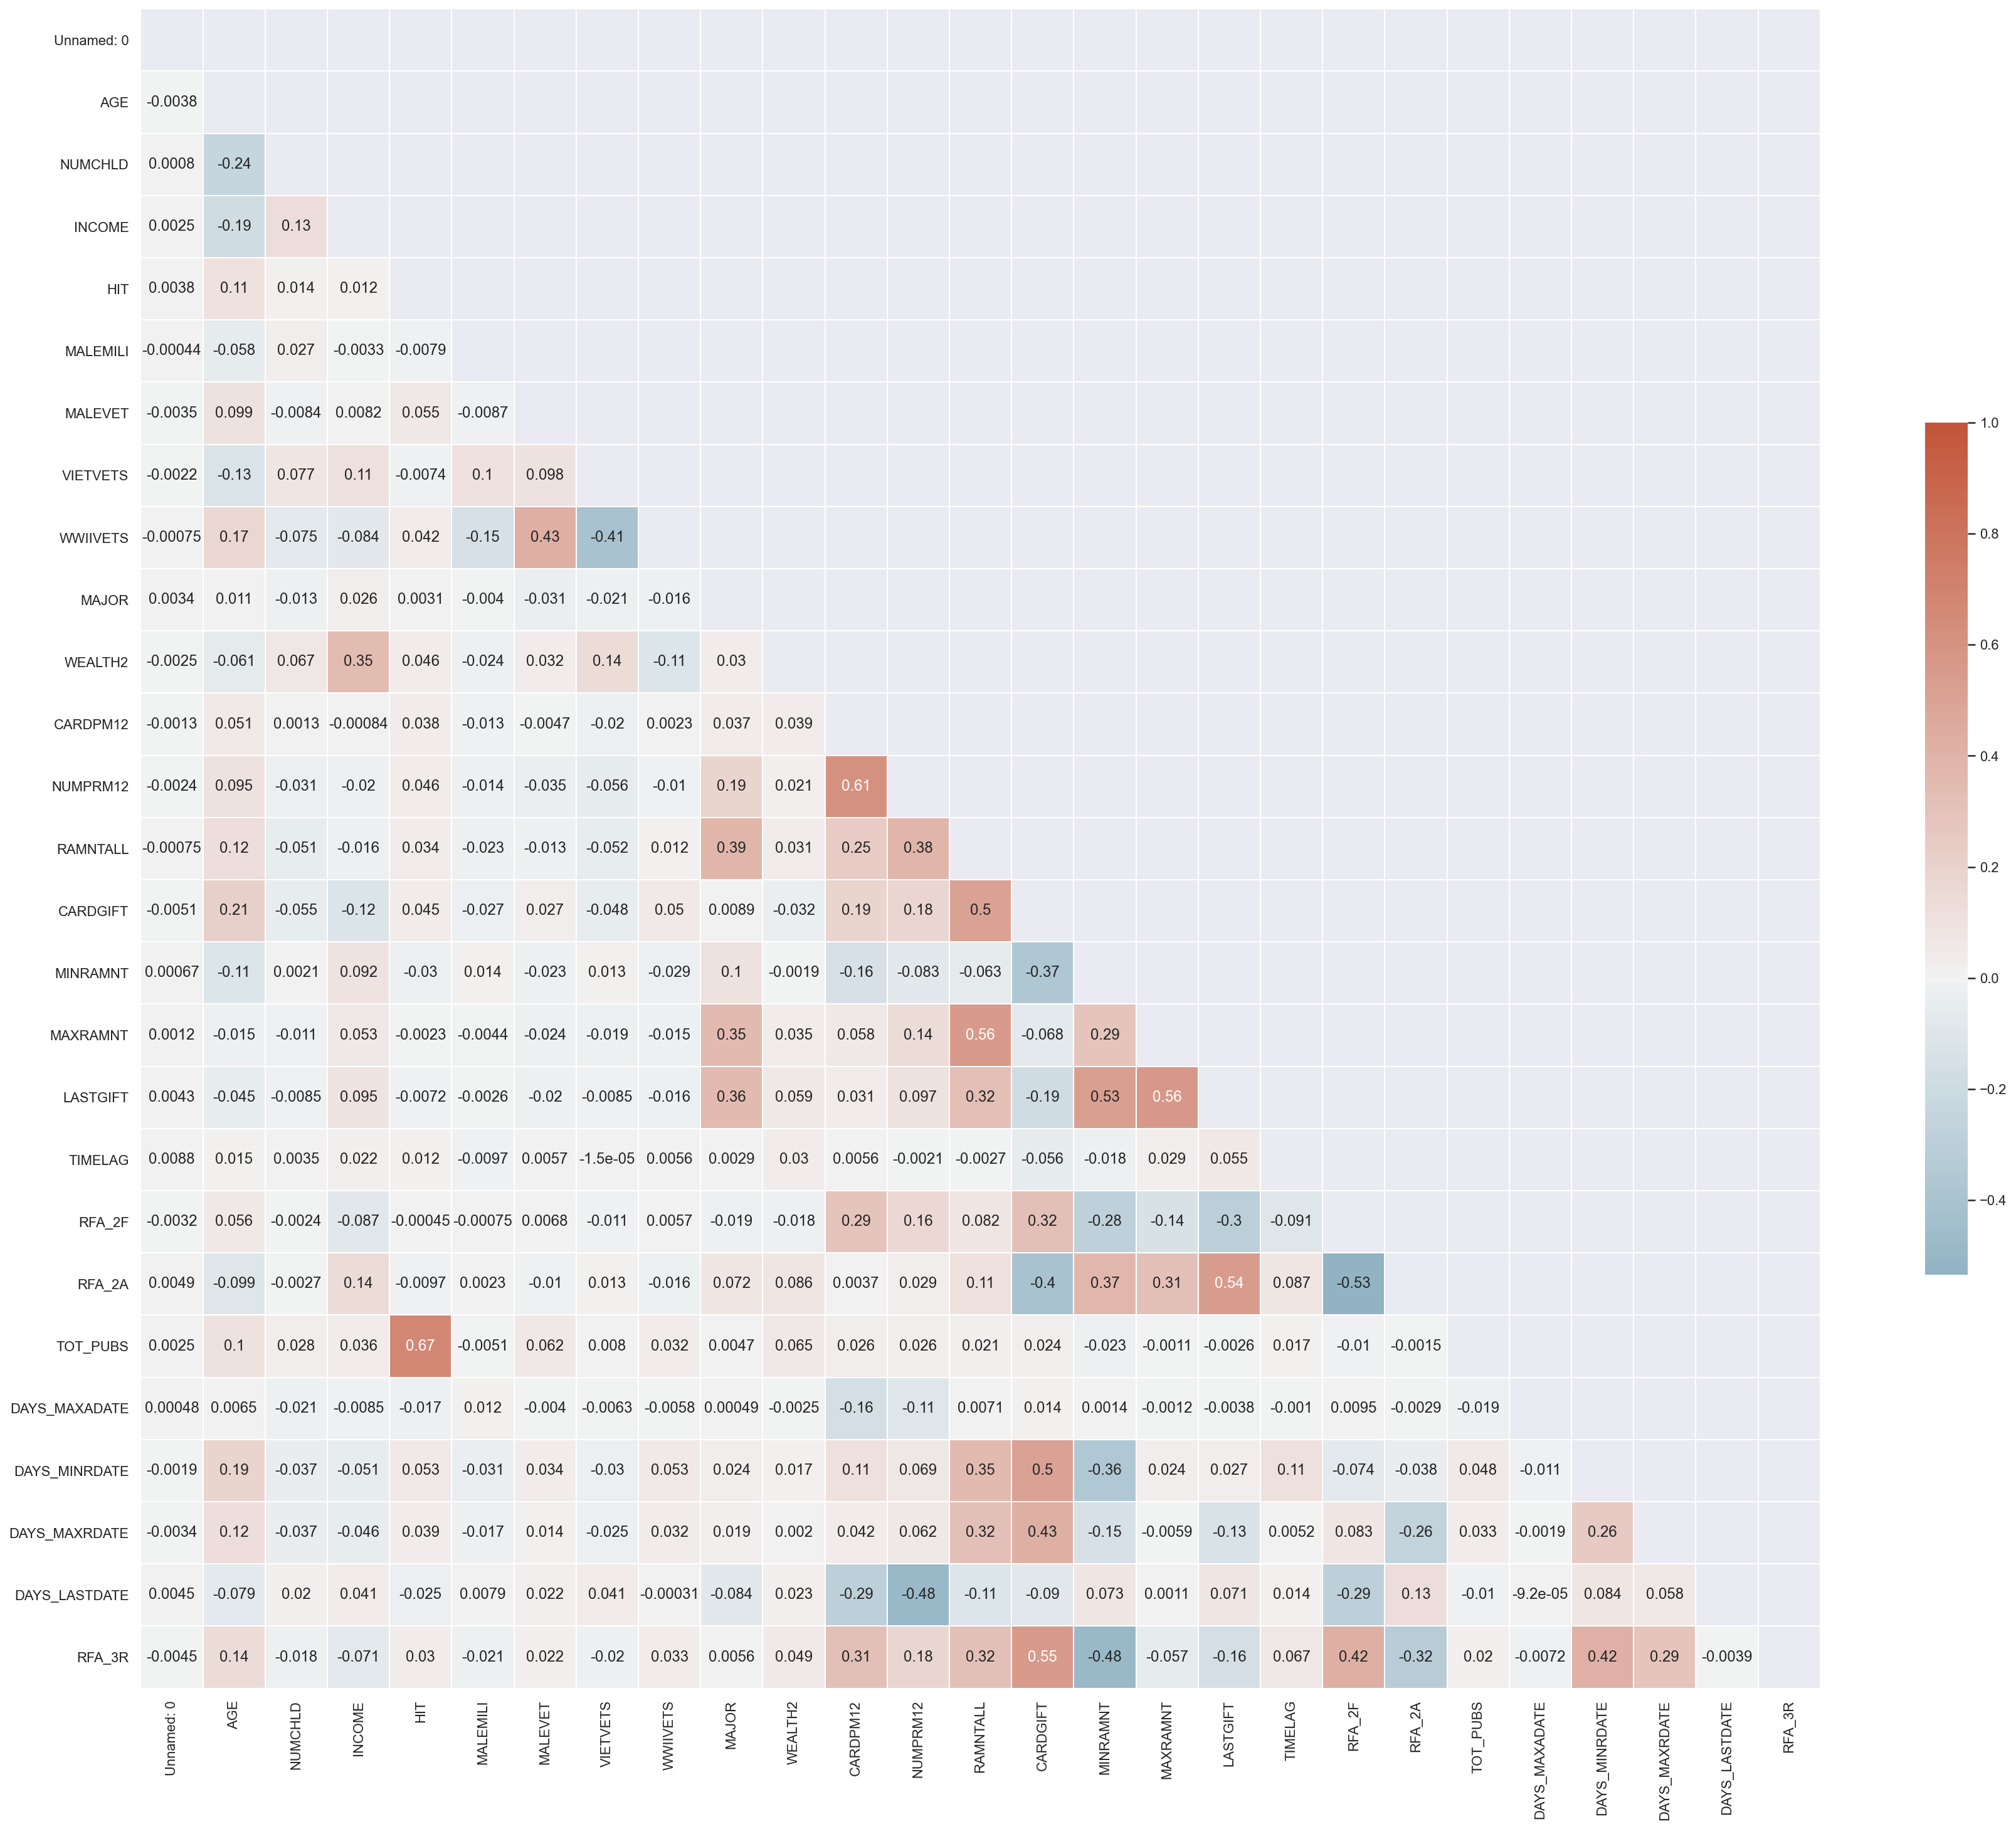

In [156]:
sns.set_theme()
corr = data_neighbors_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [157]:
corr8 = data_neighbors_df.corr()

In [158]:
print(corr8["TOT_PUBS"].abs().sum())
print(corr8["HIT"].abs().sum())

2.2958614881466177
2.356572660973052


In [159]:
data_neighbors_df.drop(columns='HIT', inplace=True)

In [160]:
data_neighbors_df.to_excel('data_neighbors_f.xlsx')

In [161]:
len(data_neighbors_df.columns)

26

In [162]:
data_neighbors_df_2= data_neighbors_df.copy()

### PCA

In [123]:
data_neighbors_df.drop(columns='Unnamed: 0', inplace =True)

In [124]:
from sklearn.decomposition import PCA

In [125]:
pca = PCA()
pca_feat = pca.fit_transform(data_neighbors_df)

In [126]:
cov_matrix = data_neighbors_df.cov()
cov_matrix

AGE   NUMCHLD    INCOME  MALEMILI   MALEVET      VIETVETS  \
AGE            0.030546 -0.003521 -0.009481 -0.000522  0.002010 -3.500635e-03   
NUMCHLD       -0.003521  0.007106  0.003062  0.000118 -0.000082  9.891459e-04   
INCOME        -0.009481  0.003062  0.079843 -0.000048  0.000268  4.617432e-03   
MALEMILI      -0.000522  0.000118 -0.000048  0.002618 -0.000051  7.988230e-04   
MALEVET        0.002010 -0.000082  0.000268 -0.000051  0.013425  1.735821e-03   
VIETVETS      -0.003501  0.000989  0.004617  0.000799  0.001736  2.325702e-02   
WWIIVETS       0.005232 -0.001129 -0.004229 -0.001387  0.008886 -1.129381e-02   
MAJOR          0.000107 -0.000060  0.000404 -0.000011 -0.000198 -1.750513e-04   
WEALTH2       -0.002717  0.001429  0.024827 -0.000314  0.000938  5.497427e-03   
CARDPM12       0.000568  0.000007 -0.000015 -0.000042 -0.000035 -1.993283e-04   
NUMPRM12       0.000982 -0.000152 -0.000334 -0.000043 -0.000242 -5.076973e-04   
RAMNTALL       0.000273 -0.000053 -0.000058 -0.000015 -0.000019 -9.984448e-05   
CARDGIFT       0.004111 -0.000507 -0.003604 -0.000154  0.000351 -8.041835e-04   
MINRAMNT      -0.000171  0.000002  0.000227  0.000006 -0.000024  1.754820e-05   
MAXRAMNT      -0.000013 -0.000005  0.000076 -0.000001 -0.000014 -1.424347e-05   
LASTGIFT      -0.000110 -0.000010  0.000373 -0.000002 -0.000032 -1.805601e-05   
TIMELAG        0.000019  0.000002  0.000045 -0.000004  0.000005 -1.686717e-08   
RFA_2F         0.003490 -0.000074 -0.008761 -0.000014  0.000283 -5.833616e-04   
RFA_2A        -0.004868 -0.000064  0.011040  0.000033 -0.000340  5.677955e-04   
TOT_PUBS       0.001324  0.000179  0.000769 -0.000020  0.000545  9.290552e-05   
DAYS_MAXADATE  0.000027 -0.000041 -0.000057  0.000014 -0.000011 -2.249913e-05   
DAYS_MINRDATE  0.004042 -0.000386 -0.001765 -0.000197  0.000476 -5.592034e-04   
DAYS_MAXRDATE  0.001705 -0.000249 -0.001038 -0.000068  0.000130 -3.079908e-04   
DAYS_LASTDATE -0.002362  0.000296  0.001986  0.000069  0.000437  1.078742e-03   
RFA_3R         0.004928 -0.000307 -0.004132 -0.000221  0.000519 -6.221469e-04   

               WWIIVETS         MAJOR   WEALTH2  CARDPM12      NUMPRM12  \
AGE            0.005232  1.068022e-04 -0.002717  0.000568  9.821327e-04   
NUMCHLD       -0.001129 -6.035367e-05  0.001429  0.000007 -1.519606e-04   
INCOME        -0.004229  4.043590e-04  0.024827 -0.000015 -3.342917e-04   
MALEMILI      -0.001387 -1.124768e-05 -0.000314 -0.000042 -4.342084e-05   
MALEVET        0.008886 -1.983897e-04  0.000938 -0.000035 -2.417694e-04   
VIETVETS      -0.011294 -1.750513e-04  0.005497 -0.000199 -5.076973e-04   
WWIIVETS       0.031998 -1.561018e-04 -0.005087  0.000027 -1.100841e-04   
MAJOR         -0.000156  3.071911e-03  0.000424  0.000131  6.190662e-04   
WEALTH2       -0.005087  4.235004e-04  0.064784  0.000633  3.202500e-04   
CARDPM12       0.000027  1.309635e-04  0.000633  0.004122  2.323788e-03   
NUMPRM12      -0.000110  6.190662e-04  0.000320  0.002324  3.482584e-03   
RAMNTALL       0.000027  2.683644e-04  0.000099  0.000198  2.834916e-04   
CARDGIFT       0.000989  5.441843e-05 -0.000894  0.001316  1.197620e-03   
MINRAMNT      -0.000045  4.903088e-05 -0.000004 -0.000087 -4.305734e-05   
MAXRAMNT      -0.000014  9.862335e-05  0.000045  0.000019  4.221638e-05   
LASTGIFT      -0.000039  2.758166e-04  0.000209  0.000028  8.019704e-05   
TIMELAG        0.000007  1.170564e-06  0.000055  0.000003 -8.828216e-07   
RFA_2F         0.000367 -3.792562e-04 -0.001662  0.006762  3.299928e-03   
RFA_2A        -0.000815  1.116526e-03  0.006120  0.000067  4.766562e-04   
TOT_PUBS       0.000440  1.975410e-05  0.001246  0.000127  1.141411e-04   
DAYS_MAXADATE -0.000024  6.365809e-07 -0.000015 -0.000244 -1.479819e-04   
DAYS_MINRDATE  0.001152  1.635491e-04  0.000521  0.000850  4.976644e-04   
DAYS_MAXRDATE  0.000461  8.436428e-05  0.000040  0.000216  2.919129e-04   
DAYS_LASTDATE -0.000010 -7.969513e-04  0.000995 -0.003206 -4.903808e-03   
RFA_3R         0.001210  6.371547e-05 

In [127]:
pd.DataFrame(pca.components_.T @ np.diag(pca.explained_variance_) @ pca.components_, 
             index=cov_matrix.index, 
             columns=cov_matrix.columns)

AGE   NUMCHLD    INCOME  MALEMILI   MALEVET      VIETVETS  \
AGE            0.030546 -0.003521 -0.009481 -0.000522  0.002010 -3.500635e-03   
NUMCHLD       -0.003521  0.007106  0.003062  0.000118 -0.000082  9.891459e-04   
INCOME        -0.009481  0.003062  0.079843 -0.000048  0.000268  4.617432e-03   
MALEMILI      -0.000522  0.000118 -0.000048  0.002618 -0.000051  7.988230e-04   
MALEVET        0.002010 -0.000082  0.000268 -0.000051  0.013425  1.735821e-03   
VIETVETS      -0.003501  0.000989  0.004617  0.000799  0.001736  2.325702e-02   
WWIIVETS       0.005232 -0.001129 -0.004229 -0.001387  0.008886 -1.129381e-02   
MAJOR          0.000107 -0.000060  0.000404 -0.000011 -0.000198 -1.750513e-04   
WEALTH2       -0.002717  0.001429  0.024827 -0.000314  0.000938  5.497427e-03   
CARDPM12       0.000568  0.000007 -0.000015 -0.000042 -0.000035 -1.993283e-04   
NUMPRM12       0.000982 -0.000152 -0.000334 -0.000043 -0.000242 -5.076973e-04   
RAMNTALL       0.000273 -0.000053 -0.000058 -0.000015 -0.000019 -9.984448e-05   
CARDGIFT       0.004111 -0.000507 -0.003604 -0.000154  0.000351 -8.041835e-04   
MINRAMNT      -0.000171  0.000002  0.000227  0.000006 -0.000024  1.754820e-05   
MAXRAMNT      -0.000013 -0.000005  0.000076 -0.000001 -0.000014 -1.424347e-05   
LASTGIFT      -0.000110 -0.000010  0.000373 -0.000002 -0.000032 -1.805601e-05   
TIMELAG        0.000019  0.000002  0.000045 -0.000004  0.000005 -1.686717e-08   
RFA_2F         0.003490 -0.000074 -0.008761 -0.000014  0.000283 -5.833616e-04   
RFA_2A        -0.004868 -0.000064  0.011040  0.000033 -0.000340  5.677955e-04   
TOT_PUBS       0.001324  0.000179  0.000769 -0.000020  0.000545  9.290552e-05   
DAYS_MAXADATE  0.000027 -0.000041 -0.000057  0.000014 -0.000011 -2.249913e-05   
DAYS_MINRDATE  0.004042 -0.000386 -0.001765 -0.000197  0.000476 -5.592034e-04   
DAYS_MAXRDATE  0.001705 -0.000249 -0.001038 -0.000068  0.000130 -3.079908e-04   
DAYS_LASTDATE -0.002362  0.000296  0.001986  0.000069  0.000437  1.078742e-03   
RFA_3R         0.004928 -0.000307 -0.004132 -0.000221  0.000519 -6.221469e-04   

               WWIIVETS         MAJOR   WEALTH2  CARDPM12      NUMPRM12  \
AGE            0.005232  1.068022e-04 -0.002717  0.000568  9.821327e-04   
NUMCHLD       -0.001129 -6.035367e-05  0.001429  0.000007 -1.519606e-04   
INCOME        -0.004229  4.043590e-04  0.024827 -0.000015 -3.342917e-04   
MALEMILI      -0.001387 -1.124768e-05 -0.000314 -0.000042 -4.342084e-05   
MALEVET        0.008886 -1.983897e-04  0.000938 -0.000035 -2.417694e-04   
VIETVETS      -0.011294 -1.750513e-04  0.005497 -0.000199 -5.076973e-04   
WWIIVETS       0.031998 -1.561018e-04 -0.005087  0.000027 -1.100841e-04   
MAJOR         -0.000156  3.071911e-03  0.000424  0.000131  6.190662e-04   
WEALTH2       -0.005087  4.235004e-04  0.064784  0.000633  3.202500e-04   
CARDPM12       0.000027  1.309635e-04  0.000633  0.004122  2.323788e-03   
NUMPRM12      -0.000110  6.190662e-04  0.000320  0.002324  3.482584e-03   
RAMNTALL       0.000027  2.683644e-04  0.000099  0.000198  2.834916e-04   
CARDGIFT       0.000989  5.441843e-05 -0.000894  0.001316  1.197620e-03   
MINRAMNT      -0.000045  4.903088e-05 -0.000004 -0.000087 -4.305734e-05   
MAXRAMNT      -0.000014  9.862335e-05  0.000045  0.000019  4.221638e-05   
LASTGIFT      -0.000039  2.758166e-04  0.000209  0.000028  8.019704e-05   
TIMELAG        0.000007  1.170564e-06  0.000055  0.000003 -8.828216e-07   
RFA_2F         0.000367 -3.792562e-04 -0.001662  0.006762  3.299928e-03   
RFA_2A        -0.000815  1.116526e-03  0.006120  0.000067  4.766562e-04   
TOT_PUBS       0.000440  1.975410e-05  0.001246  0.000127  1.141411e-04   
DAYS_MAXADATE -0.000024  6.365809e-07 -0.000015 -0.000244 -1.479819e-04   
DAYS_MINRDATE  0.001152  1.635491e-04  0.000521  0.000850  4.976644e-04   
DAYS_MAXRDATE  0.000461  8.436428e-05  0.000040  0.000216  2.919129e-04   
DAYS_LASTDATE -0.000010 -7.969513e-04  0.000995 -0.003206 -4.903808e-03   
RFA_3R         0.001210  6.371547e-05 

In [128]:
PCX = pd.DataFrame(data_neighbors_df.values @ pca.components_.T, 
             index=data_neighbors_df.index,
             columns=[f"PC{i}" for i in range(pca.n_components_)])
PCX.iloc[:,:7]

PC0       PC1       PC2       PC3       PC4       PC5       PC6
0      0.801216  0.816595  0.762246  0.434961  0.774833 -0.685218 -0.184691
1     -0.286080  1.315468  0.700038  0.678803  0.672073 -0.690398 -0.151498
2      0.842204  0.502333  0.516497  0.268760  0.892381 -0.822009 -0.262027
3      0.900102  0.138858  0.631338  0.376492  0.939665 -0.779184 -0.171584
4      0.080325  0.497672  0.825113  0.429380  1.097590 -0.393992 -0.052447
...         ...       ...       ...       ...       ...       ...       ...
95407 -0.552190  0.521412  0.342477  0.525017  0.600206 -0.462398 -0.000971
95408 -0.502933  1.114830  0.367834  0.153658  0.607331 -0.267285 -0.002227
95409  0.542589  0.850105  0.636027  0.414132  0.687022 -0.567183  0.157343
95410  0.600935  1.417615  0.560377  0.613445  1.093989 -0.718169  0.277740
95411 -0.373846  0.951111  0.972486  0.650696  1.081734 -0.493212  0.480905

[95412 rows x 7 columns]

In [129]:
pca.explained_variance_ratio_

array([3.10477811e-01, 1.70648000e-01, 8.68020121e-02, 8.04647554e-02,
       7.53160533e-02, 6.40511723e-02, 4.95221287e-02, 3.99204485e-02,
       3.39105806e-02, 1.82598891e-02, 1.23872773e-02, 1.13734578e-02,
       1.03796321e-02, 9.45386268e-03, 7.04233340e-03, 6.95300634e-03,
       5.24286366e-03, 4.32918467e-03, 2.03770850e-03, 9.08760475e-04,
       2.49575563e-04, 1.12883998e-04, 8.45694567e-05, 5.45981674e-05,
       1.74346271e-05])

In [130]:
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_+1)
)

Eigenvalue  Difference  Proportion  Cumulative
1     0.180990    0.000000    0.310478    0.310478
2     0.099477   -0.081512    0.170648    0.481126
3     0.050600   -0.048877    0.086802    0.567928
4     0.046906   -0.003694    0.080465    0.648393
5     0.043905   -0.003001    0.075316    0.723709
6     0.037338   -0.006567    0.064051    0.787760
7     0.028868   -0.008470    0.049522    0.837282
8     0.023271   -0.005597    0.039920    0.877202
9     0.019768   -0.003503    0.033911    0.911113
10    0.010644   -0.009123    0.018260    0.929373
11    0.007221   -0.003423    0.012387    0.941760
12    0.006630   -0.000591    0.011373    0.953134
13    0.006051   -0.000579    0.010380    0.963513
14    0.005511   -0.000540    0.009454    0.972967
15    0.004105   -0.001406    0.007042    0.980009
16    0.004053   -0.000052    0.006953    0.986962
17    0.003056   -0.000997    0.005243    0.992205
18    0.002524   -0.000533    0.004329    0.996534
19    0.001188   -0.001336    0.002038    0.998572
20    0.000530   -0.000658    0.000909    0.999481
21    0.000145   -0.000384    0.000250    0.999731
22    0.000066   -0.000080    0.000113    0.999843
23    0.000049   -0.000017    0.000085    0.999928
24    0.000032   -0.000017    0.000055    0.999983
25    0.000010   -0.000022    0.000017    1.000000

In [131]:
data_for_clust = PCX.iloc[:,:7]

## K-Means Cluster

In [132]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

In [133]:
#Number of clusters is just a random number just to check the algorythm
kmclust = KMeans(n_clusters=8, init='random', n_init=10, random_state=1)
# the fit method
kmclust.fit(data_for_clust)

KMeans(init='random', random_state=1)

In [134]:
pd.DataFrame(kmclust.predict(data_for_clust)).value_counts(ascending=True)

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [ ]:
#pd.DataFrame(kmclust.transform(data_for_clust))

### Defining the number of clusters

In [ ]:
range_clusters = range(1, 15)

In [ ]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(data_for_clust)
    inertia.append(kmclust.inertia_)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

In [ ]:
def percent_increase(inertia):
    percent_decrease = []
    for x in range(len(inertia)):
        if x < (len(inertia)-1):
            decrease = (inertia[x]-inertia[x+1])/inertia[x]
            percent_decrease.append(decrease)
    return(pd.DataFrame(percent_decrease, index=range(1,len(inertia))))

In [ ]:
#This DataFrame shows how much the inertia is reduced in percentage, by adding X clusters
#The initial number of clusters is 1
inet = pd.DataFrame(percent_increase(inertia))
inet.rename(columns = {0:'Inertia Reduction'})
#I would choose to keep 5 clusters, bc after adding 4 cluster (1+4) the percentage of inertia reducion per each cluster added stabelizes

#### REdoing the K-means with 5 clusters

In [ ]:
#Number of clusters is just a random number just to check the algorythm
kmclust = KMeans(n_clusters=5, init='random', n_init=10, random_state=1)
# the fit method
kmclust.fit(data_for_clust)

In [ ]:
number_clusters = 5
kmclust = KMeans(n_clusters=number_clusters, init='random', n_init=10, random_state=1)
km_labels = kmclust.fit_predict(data_for_clust)
km_labels

In [ ]:
pd.DataFrame(km_labels).value_counts(ascending=True)

In [ ]:
inverse = pd.DataFrame(scaler.inverse_transform(clust_data_c),columns=clust_data_c.columns)
inverse[data_neighbors_df.columns]

In [ ]:
df_concat = pd.concat((data_for_clust,inverse[data_neighbors_df.columns], pd.Series(km_labels, name='labels')), axis=1)
cluster_labeled = df_concat.groupby('labels').mean()
cluster_labeled

In [ ]:
cluster_labeled.to_excel('clusters_labels.xlsx')

In [ ]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [ ]:
cluster_profiles(
    df = df_concat_clust, 
    label_columns = ['PC0','PC1'], 
    figsize = (28, 13), 
)

# Moe's PCA and K-means

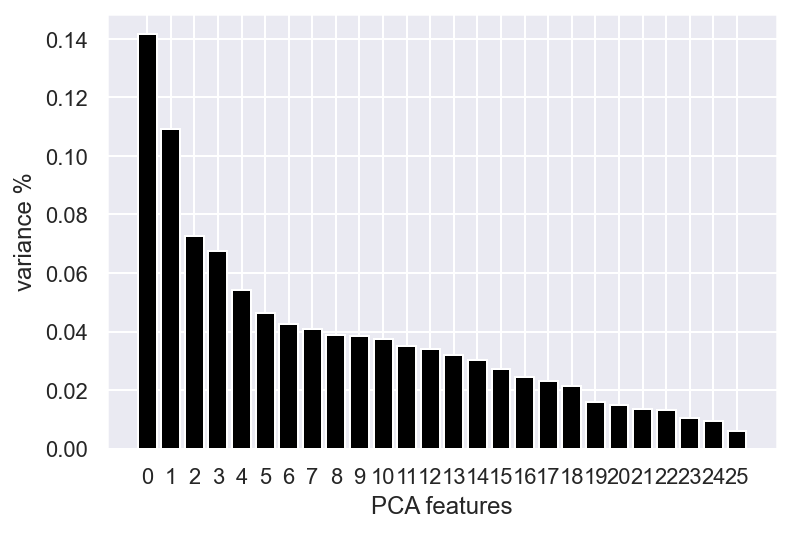

In [164]:
# Imports
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'

# Standardize the data to have a mean of ~0 and a variance of 1
data_neighbors_std = StandardScaler().fit_transform(data_neighbors_df_2)

# Create a PCA instance: pca
pca = PCA(n_components=26)
principalComponents = pca.fit_transform(data_neighbors_std)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

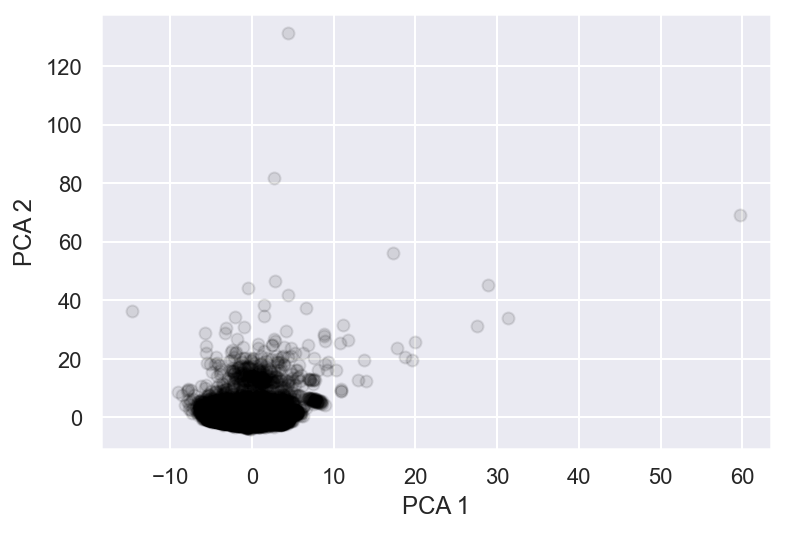

In [171]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

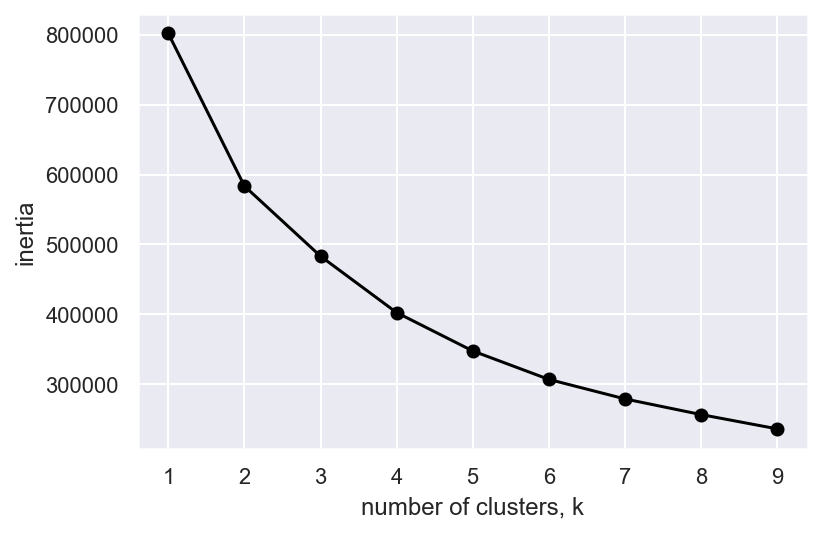

In [166]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [167]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(principalComponents)
y_kmeans = kmeans.predict(PCA_components)

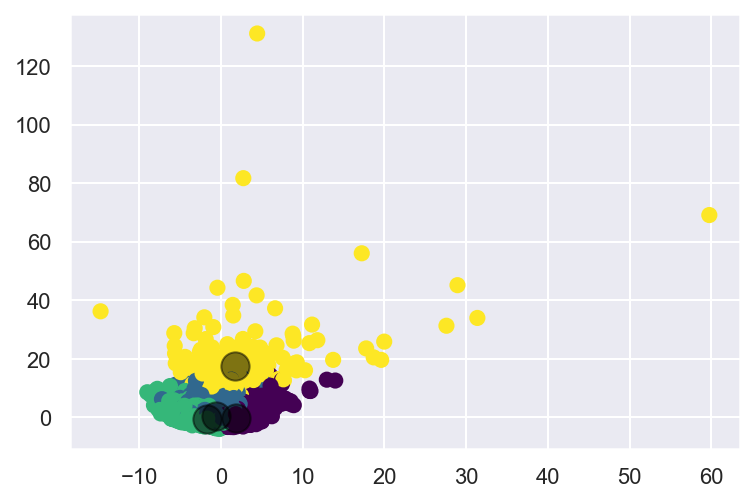

In [168]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);